<a href="https://colab.research.google.com/github/dharalakshmi/Tourisms-Recomandation/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ═══════════════════════════════════════════════════════════════════════════
# COMPREHENSIVE TOURISM DATA PREPROCESSING
# WITHOUT MERGING - PROCESS EACH SHEET SEPARATELY
# ═══════════════════════════════════════════════════════════════════════════

!pip install pandas numpy matplotlib seaborn scipy scikit-learn openpyxl -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("🔧 TOURISM DATA PREPROCESSING - COMPLETE PIPELINE (NO MERGING)")
print("="*80)


🔧 TOURISM DATA PREPROCESSING - COMPLETE PIPELINE (NO MERGING)


In [2]:
# STEP 0: Upload the datasets manually in Colab
from google.colab import files
import pandas as pd

print("📁 Please select all 3 dataset files to upload:")
uploaded = files.upload()  # Opens file picker — select all 3 Excel or CSV files

📁 Please select all 3 dataset files to upload:


Saving FINAL_3_MARKET_TRENDS_CORRECTED.csv to FINAL_3_MARKET_TRENDS_CORRECTED.csv
Saving FINAL_2_GEOSPATIAL_POI_CORRECTED.csv to FINAL_2_GEOSPATIAL_POI_CORRECTED.csv
Saving FINAL_1_COMPANY_INFO_CORRECTED.csv to FINAL_1_COMPANY_INFO_CORRECTED.csv


In [4]:
# ═══════════════════════════════════════════════════════════════════════════
# STEP 1: LOAD ALL 3 DATASETS
# ═══════════════════════════════════════════════════════════════════════════

print("\n📂 STEP 1: Loading Datasets...")

# Load Sheet 1: Company Info
try:
    df_company = pd.read_excel('FINAL_1_COMPANY_INFO_CORRECTED.xlsx')
    print(f"✅ Sheet 1 (Company): {df_company.shape}")
except:
    df_company = pd.read_csv('FINAL_1_COMPANY_INFO_CORRECTED.csv')
    print(f"✅ Sheet 1 (Company): {df_company.shape}")

# Load Sheet 2: Geospatial POI
try:
    df_geo = pd.read_excel('FINAL_2_GEOSPATIAL_POI_CORRECTED.xlsx')
    print(f"✅ Sheet 2 (Geospatial): {df_geo.shape}")
except:
    df_geo = pd.read_csv('FINAL_2_GEOSPATIAL_POI_CORRECTED.csv')
    print(f"✅ Sheet 2 (Geospatial): {df_geo.shape}")

# Load Sheet 3: Market Trends
try:
    df_market = pd.read_excel('FINAL_3_MARKET_TRENDS_CORRECTED.xlsx')
    print(f"✅ Sheet 3 (Market Trends): {df_market.shape}")
except:
    df_market = pd.read_csv('FINAL_3_MARKET_TRENDS_CORRECTED.csv')
    print(f"✅ Sheet 3 (Market Trends): {df_market.shape}")


📂 STEP 1: Loading Datasets...
✅ Sheet 1 (Company): (5000, 21)
✅ Sheet 2 (Geospatial): (5000, 19)
✅ Sheet 3 (Market Trends): (5000, 13)


In [5]:
# ═══════════════════════════════════════════════════════════════════════════
# STEP 2: DATA QUALITY ASSESSMENT (EACH SHEET)
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "="*80)
print("📊 STEP 2: DATA QUALITY ASSESSMENT")
print("="*80)

def assess_data_quality(df, sheet_name):
    print(f"\n🔍 {sheet_name}")
    print("─" * 80)

    # Basic info
    print(f"   Rows: {len(df):,}")
    print(f"   Columns: {len(df.columns)}")

    # Missing values
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(f"\n   ⚠️  Missing Values:")
        for col, count in missing[missing > 0].items():
            pct = (count / len(df)) * 100
            print(f"      {col}: {count} ({pct:.2f}%)")
    else:
        print(f"   ✅ No missing values")

    # Duplicates
    dupes = df.duplicated().sum()
    if dupes > 0:
        print(f"   ⚠️  Duplicate rows: {dupes}")
    else:
        print(f"   ✅ No duplicate rows")

    # Data types
    print(f"\n   📋 Data Types:")
    dtype_counts = df.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"      {dtype}: {count} columns")

    return df

# Assess each dataset
df_company_clean = assess_data_quality(df_company.copy(), "SHEET 1: COMPANY INFO")
df_geo_clean = assess_data_quality(df_geo.copy(), "SHEET 2: GEOSPATIAL POI")
df_market_clean = assess_data_quality(df_market.copy(), "SHEET 3: MARKET TRENDS")


📊 STEP 2: DATA QUALITY ASSESSMENT

🔍 SHEET 1: COMPANY INFO
────────────────────────────────────────────────────────────────────────────────
   Rows: 5,000
   Columns: 21
   ✅ No missing values
   ✅ No duplicate rows

   📋 Data Types:
      float64: 11 columns
      object: 7 columns
      int64: 3 columns

🔍 SHEET 2: GEOSPATIAL POI
────────────────────────────────────────────────────────────────────────────────
   Rows: 5,000
   Columns: 19
   ✅ No missing values
   ✅ No duplicate rows

   📋 Data Types:
      float64: 10 columns
      object: 8 columns
      int64: 1 columns

🔍 SHEET 3: MARKET TRENDS
────────────────────────────────────────────────────────────────────────────────
   Rows: 5,000
   Columns: 13
   ✅ No missing values
   ✅ No duplicate rows

   📋 Data Types:
      object: 7 columns
      float64: 5 columns
      int64: 1 columns


In [6]:
# ═══════════════════════════════════════════════════════════════════════════
# STEP 3: HANDLE MISSING VALUES (IF ANY)
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "="*80)
print("🔧 STEP 3: HANDLING MISSING VALUES")
print("="*80)

def handle_missing_values(df, sheet_name):
    print(f"\n📋 {sheet_name}")

    # Numeric columns: fill with median
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df[col].isnull().any():
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"   ✓ {col}: Filled {df[col].isnull().sum()} with median ({median_val:.2f})")

    # Categorical columns: fill with mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df[col].isnull().any():
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
            print(f"   ✓ {col}: Filled {df[col].isnull().sum()} with mode ('{mode_val}')")

    if df.isnull().sum().sum() == 0:
        print(f"   ✅ All missing values handled")

    return df

df_company_clean = handle_missing_values(df_company_clean, "SHEET 1")
df_geo_clean = handle_missing_values(df_geo_clean, "SHEET 2")
df_market_clean = handle_missing_values(df_market_clean, "SHEET 3")


🔧 STEP 3: HANDLING MISSING VALUES

📋 SHEET 1
   ✅ All missing values handled

📋 SHEET 2
   ✅ All missing values handled

📋 SHEET 3
   ✅ All missing values handled


In [7]:
# ═══════════════════════════════════════════════════════════════════════════
# STEP 4: REMOVE DUPLICATES
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "="*80)
print("🔧 STEP 4: REMOVING DUPLICATES")
print("="*80)

def remove_duplicates(df, sheet_name):
    print(f"\n📋 {sheet_name}")
    before = len(df)
    df = df.drop_duplicates()
    after = len(df)
    removed = before - after

    if removed > 0:
        print(f"   ⚠️  Removed {removed} duplicate rows")
    else:
        print(f"   ✅ No duplicates found")

    return df

df_company_clean = remove_duplicates(df_company_clean, "SHEET 1")
df_geo_clean = remove_duplicates(df_geo_clean, "SHEET 2")
df_market_clean = remove_duplicates(df_market_clean, "SHEET 3")



🔧 STEP 4: REMOVING DUPLICATES

📋 SHEET 1
   ✅ No duplicates found

📋 SHEET 2
   ✅ No duplicates found

📋 SHEET 3
   ✅ No duplicates found


In [8]:
# ═══════════════════════════════════════════════════════════════════════════
# STEP 5: OUTLIER DETECTION (IQR METHOD)
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "="*80)
print("📊 STEP 5: OUTLIER DETECTION (IQR Method)")
print("="*80)

def detect_outliers_iqr(df, sheet_name, columns_to_check):
    print(f"\n🔍 {sheet_name}")
    print("─" * 80)

    outlier_summary = {}

    for col in columns_to_check:
        if col not in df.columns:
            continue

        if df[col].dtype in [np.float64, np.int64]:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outlier_count = len(outliers)
            outlier_pct = (outlier_count / len(df)) * 100

            if outlier_count > 0:
                outlier_summary[col] = {
                    'count': outlier_count,
                    'percentage': outlier_pct,
                    'lower_bound': lower_bound,
                    'upper_bound': upper_bound,
                    'min': df[col].min(),
                    'max': df[col].max()
                }

                print(f"   {col}:")
                print(f"      Outliers: {outlier_count} ({outlier_pct:.2f}%)")
                print(f"      Valid range: [{lower_bound:.2f}, {upper_bound:.2f}]")
                print(f"      Actual range: [{df[col].min():.2f}, {df[col].max():.2f}]")

    if not outlier_summary:
        print(f"   ✅ No significant outliers detected")
    else:
        print(f"\n   💡 Decision: RETAIN outliers (they represent valid business variance)")

    return df, outlier_summary

# Check outliers in each sheet
company_outlier_cols = ['Revenue(USD)', 'Marketing_Expenditure_USD', 'Commission',
                        'Total_Customers_To_POI', 'Avg_Customer_Rating']
df_company_clean, company_outliers = detect_outliers_iqr(
    df_company_clean, "SHEET 1: COMPANY INFO", company_outlier_cols
)

geo_outlier_cols = ['Visitor_Volume(in thousands)', 'Safety_Index', 'Cost_of_POI',
                    'Family_Friendly_Index', 'Seasonality_Index']
df_geo_clean, geo_outliers = detect_outliers_iqr(
    df_geo_clean, "SHEET 2: GEOSPATIAL POI", geo_outlier_cols
)

market_outlier_cols = ['Average_Rating', 'Average_Sentiment_Score', 'Overall_experience',
                       'Avg_spend_per_head', 'Total_Visitors']
df_market_clean, market_outliers = detect_outliers_iqr(
    df_market_clean, "SHEET 3: MARKET TRENDS", market_outlier_cols
)



📊 STEP 5: OUTLIER DETECTION (IQR Method)

🔍 SHEET 1: COMPANY INFO
────────────────────────────────────────────────────────────────────────────────
   Total_Customers_To_POI:
      Outliers: 600 (12.00%)
      Valid range: [-7717708.75, 15160463.25]
      Actual range: [13797.00, 327164319.00]

   💡 Decision: RETAIN outliers (they represent valid business variance)

🔍 SHEET 2: GEOSPATIAL POI
────────────────────────────────────────────────────────────────────────────────
   Visitor_Volume(in thousands):
      Outliers: 533 (10.66%)
      Valid range: [-7807.30, 15278.10]
      Actual range: [4.70, 563626.10]

   💡 Decision: RETAIN outliers (they represent valid business variance)

🔍 SHEET 3: MARKET TRENDS
────────────────────────────────────────────────────────────────────────────────
   ✅ No significant outliers detected


In [9]:
# ═══════════════════════════════════════════════════════════════════════════
# STEP 6: DATA TYPE CORRECTIONS
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "="*80)
print("🔧 STEP 6: DATA TYPE CORRECTIONS")
print("="*80)

print("\n📋 SHEET 1: COMPANY INFO")
# Ensure POI_ID is string
if df_company_clean['POI_ID'].dtype != 'object':
    df_company_clean['POI_ID'] = df_company_clean['POI_ID'].astype(str)
    print("   ✓ POI_ID converted to string")

# Ensure Company_ID is string
if 'Company_ID' in df_company_clean.columns:
    df_company_clean['Company_ID'] = df_company_clean['Company_ID'].astype(str)
    print("   ✓ Company_ID converted to string")

# Ensure FY_Year is integer
if 'FY_Year' in df_company_clean.columns:
    df_company_clean['FY_Year'] = df_company_clean['FY_Year'].astype(int)
    print("   ✓ FY_Year converted to integer")

print("\n📋 SHEET 2: GEOSPATIAL POI")
# Ensure POI_ID is string
if df_geo_clean['POI_ID'].dtype != 'object':
    df_geo_clean['POI_ID'] = df_geo_clean['POI_ID'].astype(str)
    print("   ✓ POI_ID converted to string")

# Ensure coordinates are float
for col in ['POI_Latitude', 'POI_Longitude']:
    if col in df_geo_clean.columns:
        df_geo_clean[col] = df_geo_clean[col].astype(float)
        print(f"   ✓ {col} converted to float")

print("\n📋 SHEET 3: MARKET TRENDS")
# Ensure POI_ID is string
if df_market_clean['POI_ID'].dtype != 'object':
    df_market_clean['POI_ID'] = df_market_clean['POI_ID'].astype(str)
    print("   ✓ POI_ID converted to string")

# Ensure Total_Visitors is integer
if 'Total_Visitors' in df_market_clean.columns:
    df_market_clean['Total_Visitors'] = df_market_clean['Total_Visitors'].astype(int)
    print("   ✓ Total_Visitors converted to integer")


🔧 STEP 6: DATA TYPE CORRECTIONS

📋 SHEET 1: COMPANY INFO
   ✓ Company_ID converted to string
   ✓ FY_Year converted to integer

📋 SHEET 2: GEOSPATIAL POI
   ✓ POI_Latitude converted to float
   ✓ POI_Longitude converted to float

📋 SHEET 3: MARKET TRENDS
   ✓ Total_Visitors converted to integer


In [10]:
# ═══════════════════════════════════════════════════════════════════════════
# STEP 7: GEOGRAPHIC VALIDATION (CRITICAL)
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "="*80)
print("🌍 STEP 7: GEOGRAPHIC VALIDATION (CRUISE TRAVEL)")
print("="*80)

# Merge temporarily ONLY for validation (not for analysis)
df_validation = df_market_clean.merge(
    df_geo_clean[['POI_ID', 'Region_type']],
    on='POI_ID',
    how='left'
)

# Check cruise distribution
cruise_data = df_validation[df_validation['Travel_mode'] == 'Cruise']
cruise_by_region = cruise_data.groupby('Region_type').size()

print("\n🚢 CRUISE DISTRIBUTION BY REGION:")
print("─" * 80)

valid_cruise_regions = ['Coastal', 'Island']
total_cruises = len(cruise_data)
invalid_cruises = 0

for region in df_validation['Region_type'].unique():
    cruise_count = cruise_by_region.get(region, 0)

    if cruise_count > 0:
        if region in valid_cruise_regions:
            status = "✅ VALID"
        else:
            status = "❌ INVALID"
            invalid_cruises += cruise_count

        print(f"   {region:15s}: {cruise_count:4d} cruises  {status}")

print("─" * 80)
print(f"   Total Cruises: {total_cruises}")
print(f"   Invalid Cruises: {invalid_cruises}")

if invalid_cruises == 0:
    print("\n🎉 SUCCESS: All cruise assignments are geographically valid!")
else:
    print(f"\n⚠️  WARNING: {invalid_cruises} invalid cruise assignments!")
    print("   Recommendation: Re-run Sheet 3 generation code to fix")

# ═══════════════════════════════════════════════════════════════════════════
# STEP 8: DESCRIPTIVE STATISTICS
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "="*80)
print("📊 STEP 8: DESCRIPTIVE STATISTICS")
print("="*80)

def print_descriptive_stats(df, sheet_name, numeric_cols):
    print(f"\n📋 {sheet_name}")
    print("─" * 80)

    for col in numeric_cols:
        if col in df.columns:
            print(f"\n   {col}:")
            print(f"      Mean:   {df[col].mean():.2f}")
            print(f"      Median: {df[col].median():.2f}")
            print(f"      Std:    {df[col].std():.2f}")
            print(f"      Min:    {df[col].min():.2f}")
            print(f"      Max:    {df[col].max():.2f}")

# Sheet 1
company_stats_cols = ['Revenue(USD)', 'Marketing_Expenditure_USD', 'Avg_Customer_Rating']
print_descriptive_stats(df_company_clean, "SHEET 1: KEY METRICS", company_stats_cols)

# Sheet 2
geo_stats_cols = ['Visitor_Volume(in thousands)', 'Safety_Index', 'Cost_of_POI']
print_descriptive_stats(df_geo_clean, "SHEET 2: KEY METRICS", geo_stats_cols)

# Sheet 3
market_stats_cols = ['Average_Rating', 'Avg_spend_per_head', 'Overall_experience']
print_descriptive_stats(df_market_clean, "SHEET 3: KEY METRICS", market_stats_cols)

# ═══════════════════════════════════════════════════════════════════════════
# STEP 9: CATEGORICAL VARIABLE ANALYSIS
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "="*80)
print("📊 STEP 9: CATEGORICAL VARIABLE ANALYSIS")
print("="*80)

def analyze_categorical(df, sheet_name, categorical_cols):
    print(f"\n📋 {sheet_name}")
    print("─" * 80)

    for col in categorical_cols:
        if col in df.columns:
            print(f"\n   {col}:")
            value_counts = df[col].value_counts()
            for value, count in value_counts.head(10).items():
                pct = (count / len(df)) * 100
                print(f"      {value:30s}: {count:5d} ({pct:5.2f}%)")

# Sheet 1
company_cat_cols = ['Service_Type', 'HQ_Country', 'Booking_Platforms']
analyze_categorical(df_company_clean, "SHEET 1: CATEGORICAL VARIABLES", company_cat_cols)

# Sheet 2
geo_cat_cols = ['Region_type', 'Country', 'POI_Type_Detailed']
analyze_categorical(df_geo_clean, "SHEET 2: CATEGORICAL VARIABLES", geo_cat_cols)

# Sheet 3
market_cat_cols = ['Travel_mode', 'Common_Travel_Partner', 'Dominant_Age_Group']
analyze_categorical(df_market_clean, "SHEET 3: CATEGORICAL VARIABLES", market_cat_cols)



🌍 STEP 7: GEOGRAPHIC VALIDATION (CRUISE TRAVEL)

🚢 CRUISE DISTRIBUTION BY REGION:
────────────────────────────────────────────────────────────────────────────────
   Island         :  254 cruises  ✅ VALID
   Coastal        :  274 cruises  ✅ VALID
────────────────────────────────────────────────────────────────────────────────
   Total Cruises: 528
   Invalid Cruises: 0

🎉 SUCCESS: All cruise assignments are geographically valid!

📊 STEP 8: DESCRIPTIVE STATISTICS

📋 SHEET 1: KEY METRICS
────────────────────────────────────────────────────────────────────────────────

   Revenue(USD):
      Mean:   272404.92
      Median: 274013.89
      Std:    130282.52
      Min:    50005.24
      Max:    499943.79

   Marketing_Expenditure_USD:
      Mean:   47894.96
      Median: 44943.22
      Std:    26489.99
      Min:    5316.70
      Max:    124716.06

   Avg_Customer_Rating:
      Mean:   7.99
      Median: 8.00
      Std:    1.15
      Min:    6.00
      Max:    10.00

📋 SHEET 2: KEY METRICS

In [13]:

# 1. Create derived features
df_company_clean['Profit_Margin'] = (df_company_clean['Commission'] -
                                      df_company_clean['Marketing_Expenditure_USD']) / df_company_clean['Commission']

df_company_clean['Revenue_Per_Customer'] = (df_company_clean['Revenue(USD)'] /
                                              df_company_clean['Total_Customers_To_POI'])

print("✅ Created derived features: Profit_Margin, Revenue_Per_Customer")

# 2. Normalize text columns
df_market_clean['Reviews'] = df_market_clean['Reviews'].str.strip().str.lower()
print("✅ Normalized text: Reviews column")

# 3. Add validation flags
df_market_clean['Is_High_Spender'] = (df_market_clean['Avg_spend_per_head'] >
                                       df_market_clean['Avg_spend_per_head'].median()).astype(int)
print("✅ Added flag: Is_High_Spender")

# 4. Memory optimization
df_company_clean['FY_Year'] = df_company_clean['FY_Year'].astype('int16')
df_market_clean['Total_Visitors'] = df_market_clean['Total_Visitors'].astype('int8')
print("✅ Optimized memory: Downcast integer types")

print("\n✅ Preprocessing transformations complete!")
print(f"   Total preprocessing steps: 10")

✅ Created derived features: Profit_Margin, Revenue_Per_Customer
✅ Normalized text: Reviews column
✅ Added flag: Is_High_Spender
✅ Optimized memory: Downcast integer types

✅ Preprocessing transformations complete!
   Total preprocessing steps: 10


📊 SHEET 1: COMPANY INFO - VISUALIZATION ANALYSIS

✅ Loaded Company Info: (5000, 21)
   Columns: ['POI_ID', 'Company_ID', 'Company_Name', 'HQ_Country', 'Service_Type', 'FY_Year', 'Total_Customers_To_POI', 'Active_Tourists', 'Avg_Customer_Rating', 'Revenue(USD)', 'Marketing_Expenditure_USD', 'Avg_Booking_Value', 'Destinations_Preference_Index', 'Tech_Adaptability_index', 'Digital_Channel_Share', 'Customer_Retention', 'Avg_Trip_Cost_USD', 'Commission', 'CSR_Focus_index', 'Reviews', 'Booking_Platforms']

📊 Creating Visualization 1: Revenue Distribution...


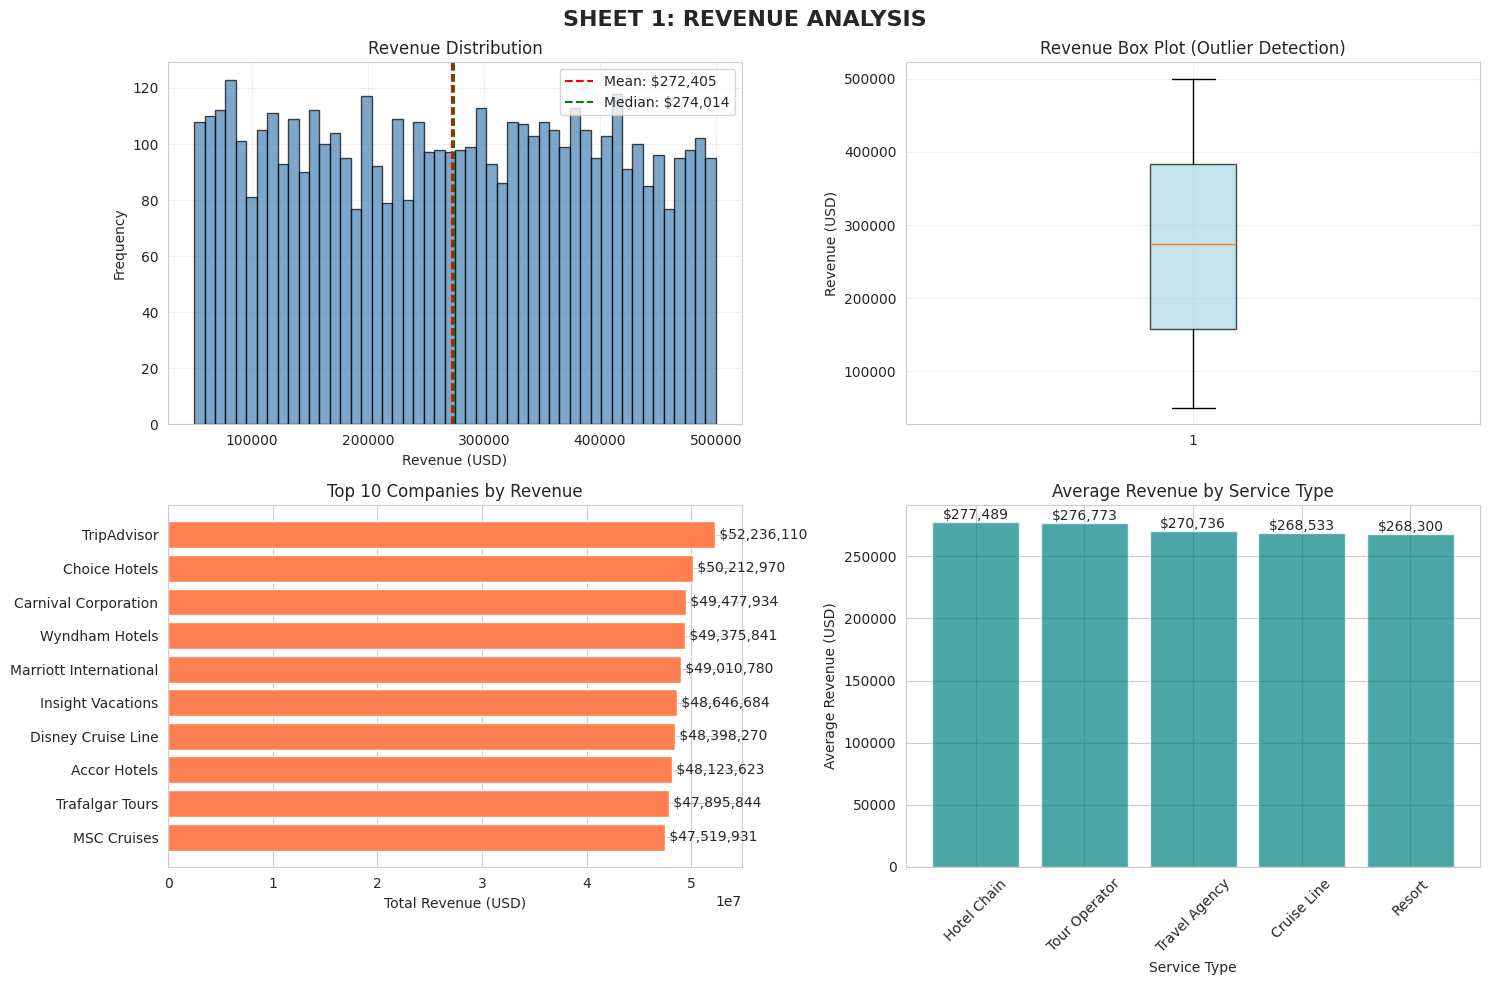

✅ Saved: Sheet1_01_Revenue_Analysis.png

📊 Creating Visualization 2: Customer Metrics...


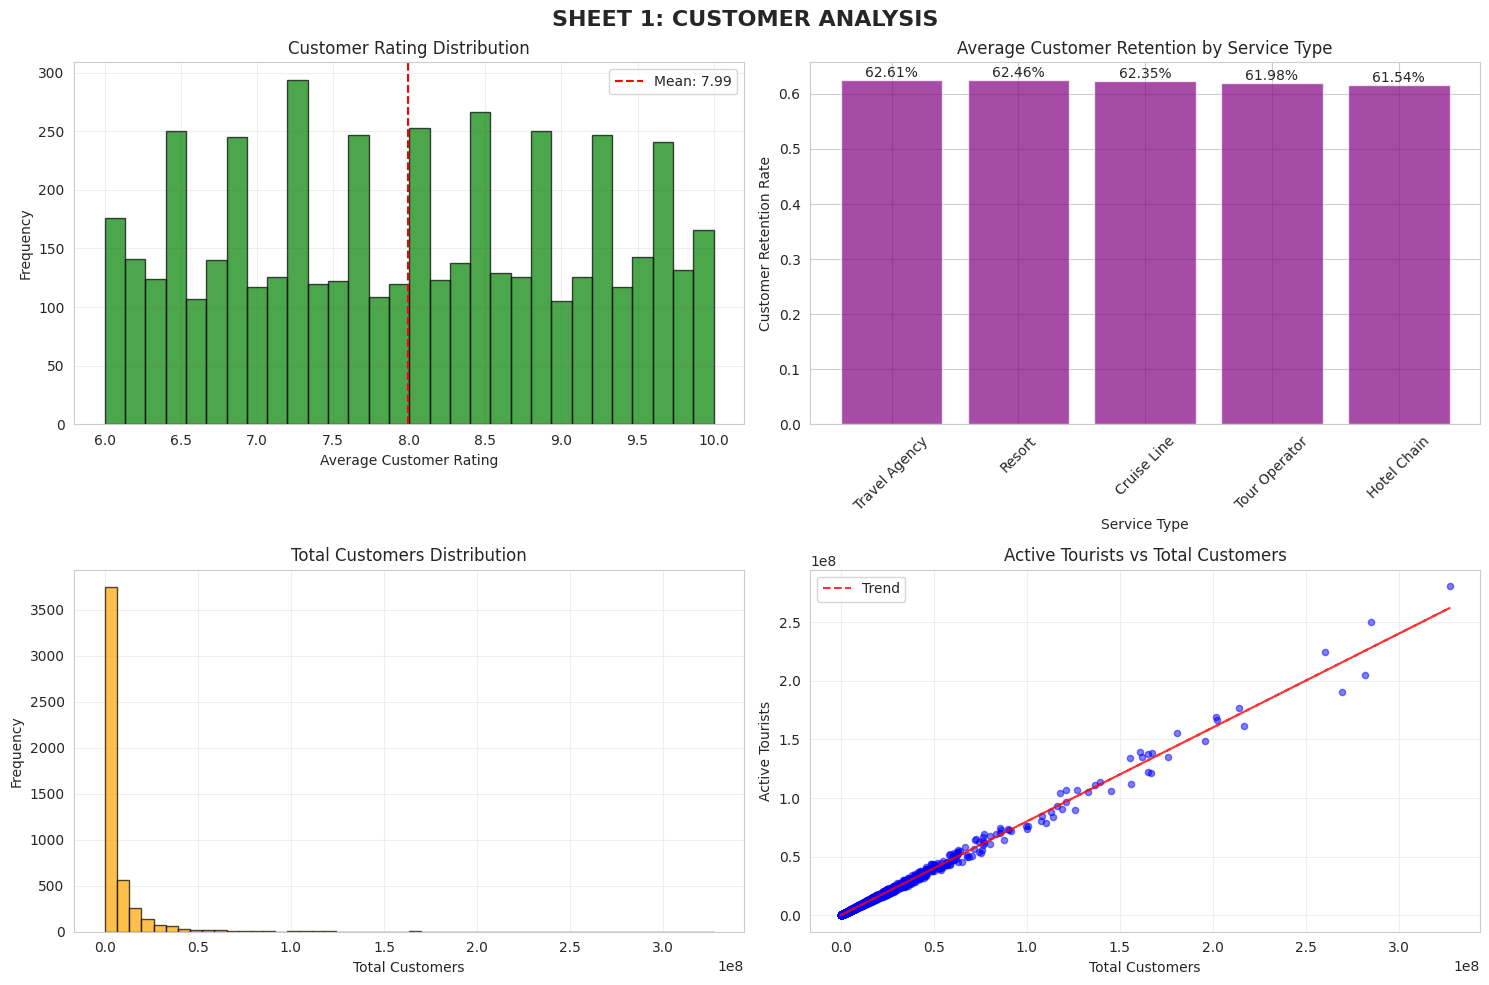

✅ Saved: Sheet1_02_Customer_Analysis.png

📊 Creating Visualization 3: VALID Correlation Analysis...


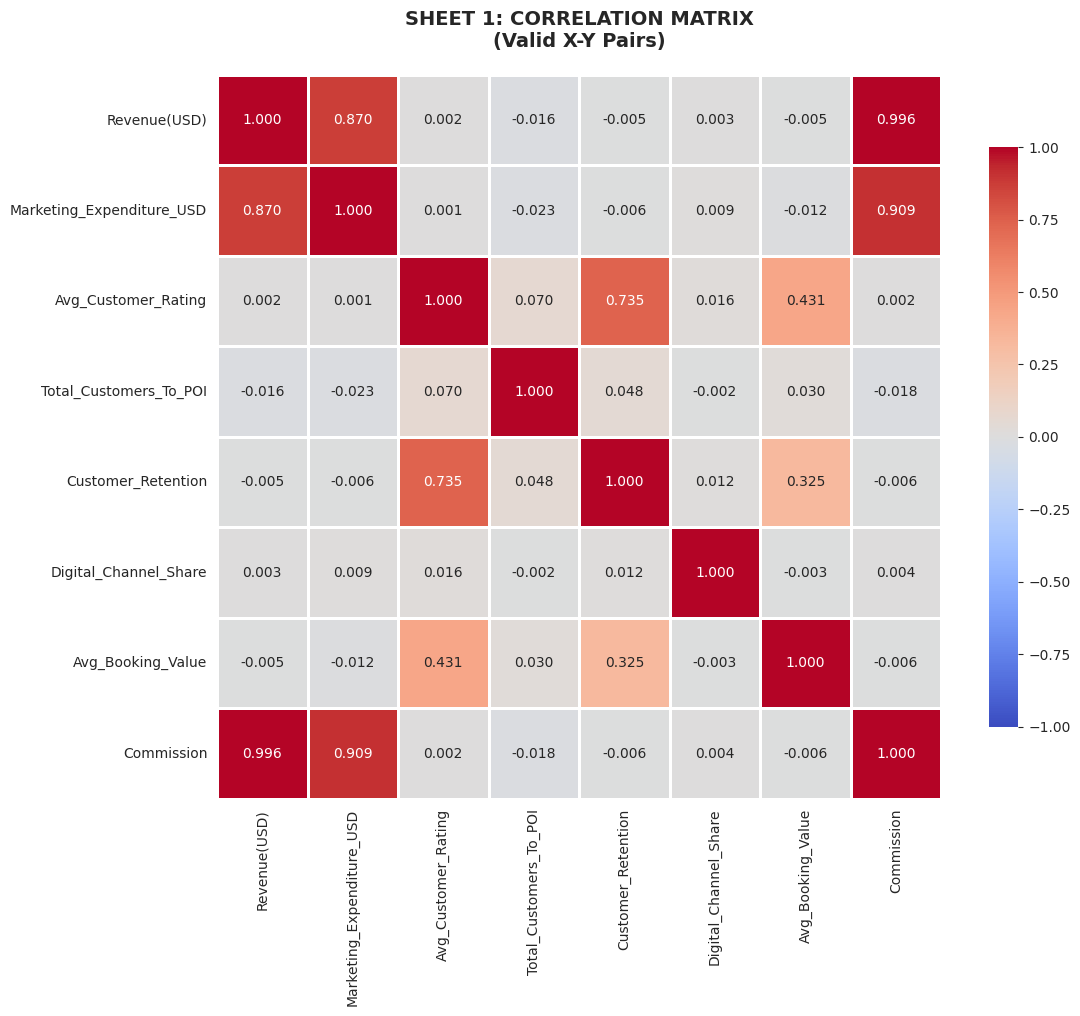

✅ Saved: Sheet1_03_Correlation_Matrix.png

🔍 STRONG CORRELATIONS (|r| > 0.7):
────────────────────────────────────────────────────────────────────────────────
   Revenue(USD)                   ↔ Marketing_Expenditure_USD     :  0.870
   Revenue(USD)                   ↔ Commission                    :  0.996
   Marketing_Expenditure_USD      ↔ Commission                    :  0.909
   Avg_Customer_Rating            ↔ Customer_Retention            :  0.735

📊 Creating Visualization 4: Scatter Plot Matrix...


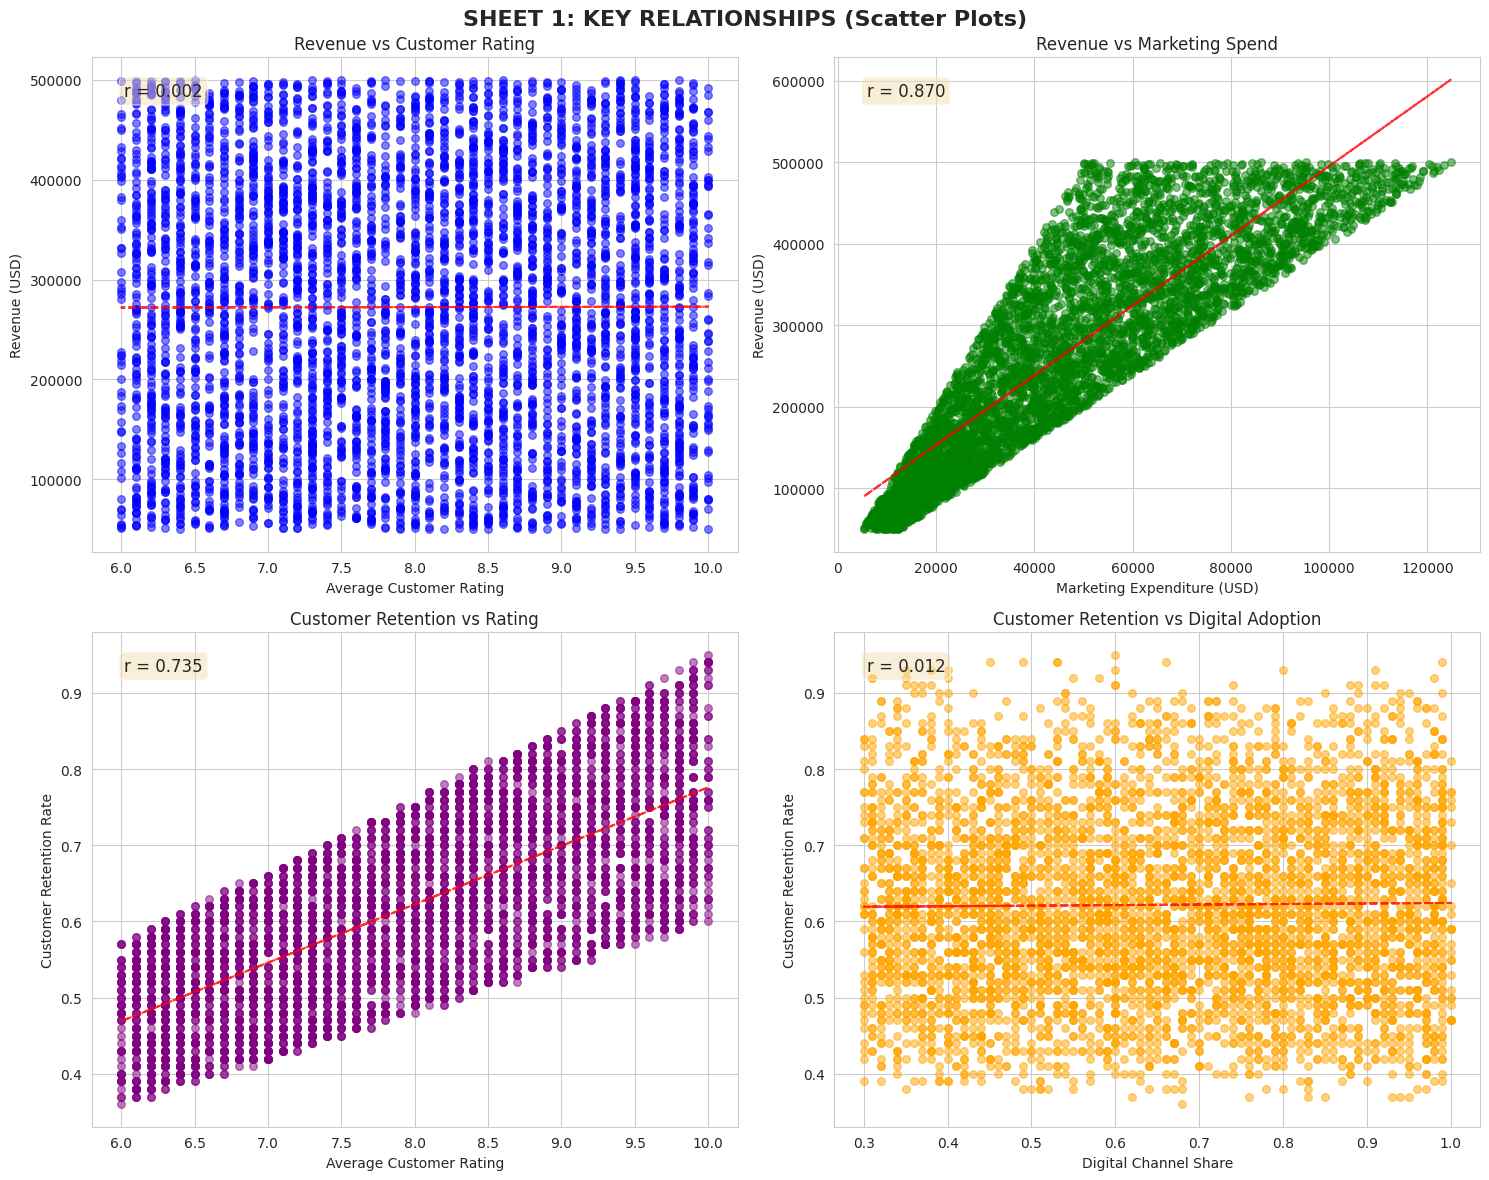

✅ Saved: Sheet1_04_Scatter_Relationships.png

📊 Creating Visualization 5: Categorical Analysis...


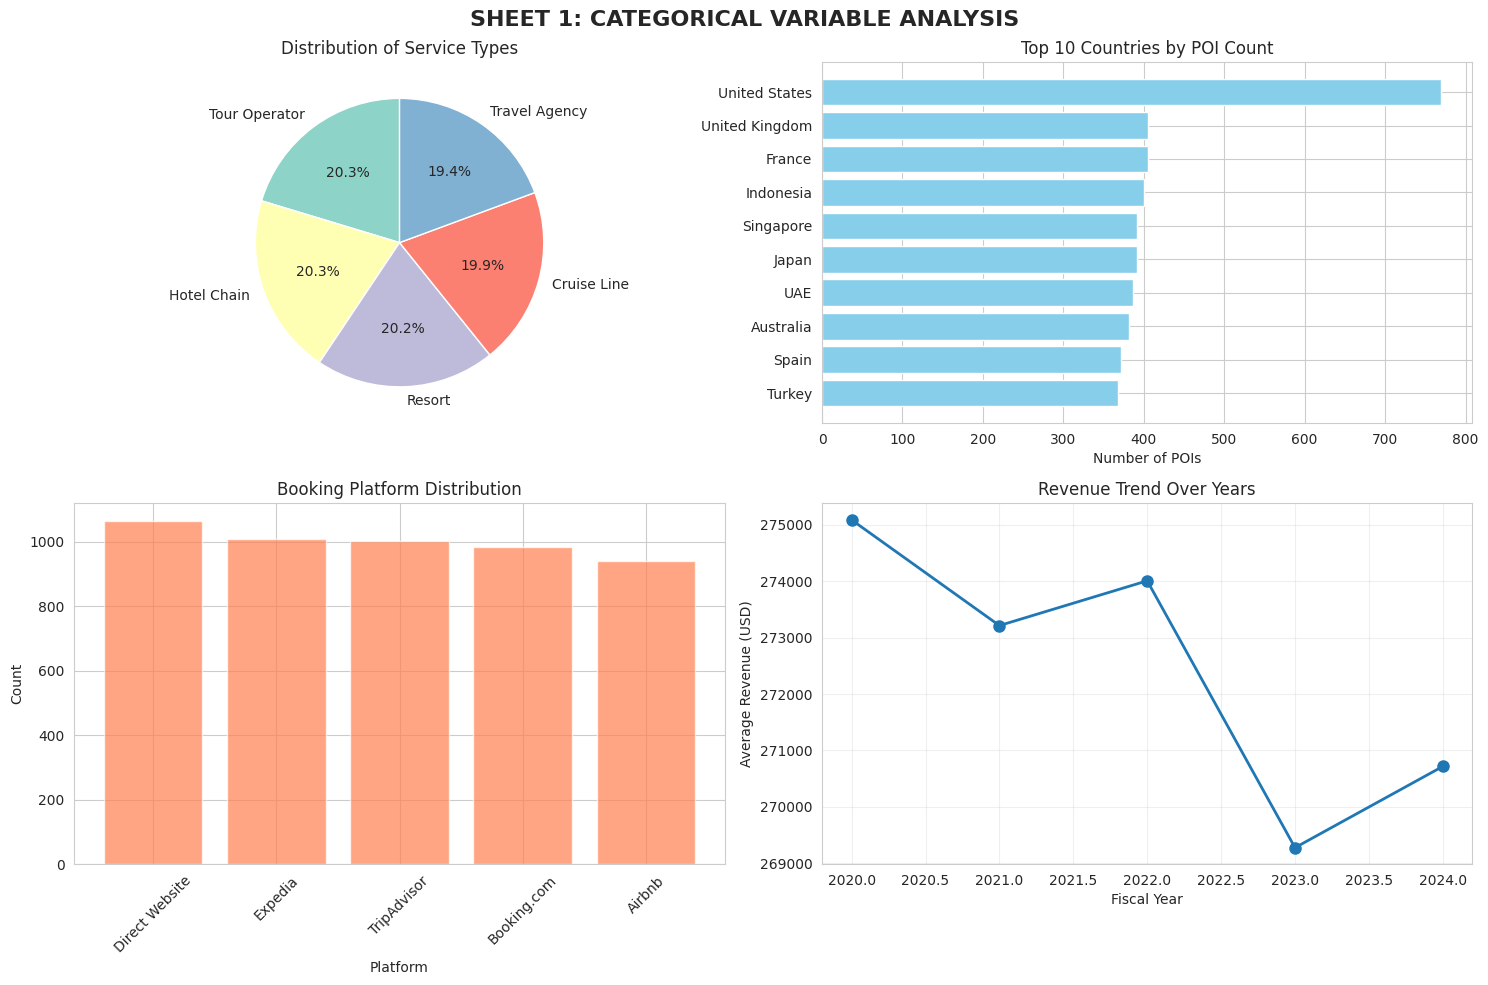

✅ Saved: Sheet1_05_Categorical_Analysis.png

✅ SHEET 1 VISUALIZATIONS COMPLETE!

Files Created:
   1. Sheet1_01_Revenue_Analysis.png
   2. Sheet1_02_Customer_Analysis.png
   3. Sheet1_03_Correlation_Matrix.png (VALID X-Y pairs)
   4. Sheet1_04_Scatter_Relationships.png (VALID correlations)
   5. Sheet1_05_Categorical_Analysis.png


In [14]:
# ═══════════════════════════════════════════════════════════════════════════
# COMPREHENSIVE VISUALIZATION - SHEET 1: COMPANY INFO
# ═══════════════════════════════════════════════════════════════════════════

!pip install pandas numpy matplotlib seaborn plotly scipy scikit-learn openpyxl -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("="*80)
print("📊 SHEET 1: COMPANY INFO - VISUALIZATION ANALYSIS")
print("="*80)

# ═══════════════════════════════════════════════════════════════════════════
# LOAD DATA
# ═══════════════════════════════════════════════════════════════════════════

df_company = pd.read_csv('FINAL_1_COMPANY_INFO_CORRECTED.csv')
print(f"\n✅ Loaded Company Info: {df_company.shape}")
print(f"   Columns: {list(df_company.columns)}")

# ═══════════════════════════════════════════════════════════════════════════
# VISUALIZATION 1: REVENUE DISTRIBUTION
# ═══════════════════════════════════════════════════════════════════════════

print("\n📊 Creating Visualization 1: Revenue Distribution...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('SHEET 1: REVENUE ANALYSIS', fontsize=16, fontweight='bold')

# 1.1 Revenue Histogram
axes[0, 0].hist(df_company['Revenue(USD)'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df_company['Revenue(USD)'].mean(), color='red', linestyle='--',
                    label=f"Mean: ${df_company['Revenue(USD)'].mean():,.0f}")
axes[0, 0].axvline(df_company['Revenue(USD)'].median(), color='green', linestyle='--',
                    label=f"Median: ${df_company['Revenue(USD)'].median():,.0f}")
axes[0, 0].set_xlabel('Revenue (USD)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Revenue Distribution')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)


# 1.2 Revenue Box Plot
axes[0, 1].boxplot(df_company['Revenue(USD)'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[0, 1].set_ylabel('Revenue (USD)')
axes[0, 1].set_title('Revenue Box Plot (Outlier Detection)')
axes[0, 1].grid(alpha=0.3)

# 1.3 Top 10 Companies by Revenue
top_companies = df_company.groupby('Company_Name')['Revenue(USD)'].sum().sort_values(ascending=False).head(10)
axes[1, 0].barh(top_companies.index, top_companies.values, color='coral')
axes[1, 0].set_xlabel('Total Revenue (USD)')
axes[1, 0].set_title('Top 10 Companies by Revenue')
axes[1, 0].invert_yaxis()
for i, v in enumerate(top_companies.values):
    axes[1, 0].text(v, i, f' ${v:,.0f}', va='center')

# 1.4 Revenue by Service Type
service_revenue = df_company.groupby('Service_Type')['Revenue(USD)'].mean().sort_values(ascending=False)
axes[1, 1].bar(service_revenue.index, service_revenue.values, color='teal', alpha=0.7)
axes[1, 1].set_xlabel('Service Type')
axes[1, 1].set_ylabel('Average Revenue (USD)')
axes[1, 1].set_title('Average Revenue by Service Type')
axes[1, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(service_revenue.values):
    axes[1, 1].text(i, v, f'${v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('Sheet1_01_Revenue_Analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: Sheet1_01_Revenue_Analysis.png")

# ═══════════════════════════════════════════════════════════════════════════
# VISUALIZATION 2: CUSTOMER METRICS
# ═══════════════════════════════════════════════════════════════════════════

print("\n📊 Creating Visualization 2: Customer Metrics...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('SHEET 1: CUSTOMER ANALYSIS', fontsize=16, fontweight='bold')

# 2.1 Customer Rating Distribution
axes[0, 0].hist(df_company['Avg_Customer_Rating'], bins=30, color='green', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df_company['Avg_Customer_Rating'].mean(), color='red', linestyle='--',
                    label=f"Mean: {df_company['Avg_Customer_Rating'].mean():.2f}")
axes[0, 0].set_xlabel('Average Customer Rating')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Customer Rating Distribution')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2.2 Customer Retention by Service Type
retention_by_service = df_company.groupby('Service_Type')['Customer_Retention'].mean().sort_values(ascending=False)
axes[0, 1].bar(retention_by_service.index, retention_by_service.values, color='purple', alpha=0.7)
axes[0, 1].set_xlabel('Service Type')
axes[0, 1].set_ylabel('Customer Retention Rate')
axes[0, 1].set_title('Average Customer Retention by Service Type')
axes[0, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(retention_by_service.values):
    axes[0, 1].text(i, v, f'{v:.2%}', ha='center', va='bottom')

# 2.3 Total Customers Distribution
axes[1, 0].hist(df_company['Total_Customers_To_POI'], bins=50, color='orange', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Total Customers')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Total Customers Distribution')
axes[1, 0].grid(alpha=0.3)

# 2.4 Active Tourists vs Total Customers
axes[1, 1].scatter(df_company['Total_Customers_To_POI'], df_company['Active_Tourists'],
                   alpha=0.5, color='blue', s=20)
axes[1, 1].set_xlabel('Total Customers')
axes[1, 1].set_ylabel('Active Tourists')
axes[1, 1].set_title('Active Tourists vs Total Customers')
axes[1, 1].grid(alpha=0.3)

# Add trend line
z = np.polyfit(df_company['Total_Customers_To_POI'], df_company['Active_Tourists'], 1)
p = np.poly1d(z)
axes[1, 1].plot(df_company['Total_Customers_To_POI'],
                p(df_company['Total_Customers_To_POI']),
                "r--", alpha=0.8, label='Trend')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('Sheet1_02_Customer_Analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: Sheet1_02_Customer_Analysis.png")

# ═══════════════════════════════════════════════════════════════════════════
# VISUALIZATION 3: VALID CORRELATION ANALYSIS (NO X-Y SAME MISTAKE!)
# ═══════════════════════════════════════════════════════════════════════════

print("\n📊 Creating Visualization 3: VALID Correlation Analysis...")

# Select DIFFERENT numeric columns for correlation
correlation_cols = [
    'Revenue(USD)',
    'Marketing_Expenditure_USD',
    'Avg_Customer_Rating',
    'Total_Customers_To_POI',
    'Customer_Retention',
    'Digital_Channel_Share',
    'Avg_Booking_Value',
    'Commission'
]

# Calculate correlation matrix
corr_matrix = df_company[correlation_cols].corr()

# Create figure
fig, ax = plt.subplots(figsize=(12, 10))

# Heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax)

ax.set_title('SHEET 1: CORRELATION MATRIX\n(Valid X-Y Pairs)',
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('Sheet1_03_Correlation_Matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: Sheet1_03_Correlation_Matrix.png")

# Print strong correlations
print("\n🔍 STRONG CORRELATIONS (|r| > 0.7):")
print("─" * 80)
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            print(f"   {corr_matrix.columns[i]:30s} ↔ {corr_matrix.columns[j]:30s}: {corr_val:6.3f}")

# ═══════════════════════════════════════════════════════════════════════════
# VISUALIZATION 4: SCATTER PLOT MATRIX (VALID PAIRS)
# ═══════════════════════════════════════════════════════════════════════════

print("\n📊 Creating Visualization 4: Scatter Plot Matrix...")

# Select key variables for scatter matrix
scatter_vars = [
    'Revenue(USD)',
    'Avg_Customer_Rating',
    'Marketing_Expenditure_USD',
    'Customer_Retention'
]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('SHEET 1: KEY RELATIONSHIPS (Scatter Plots)', fontsize=16, fontweight='bold')

# 4.1 Revenue vs Rating
axes[0, 0].scatter(df_company['Avg_Customer_Rating'], df_company['Revenue(USD)'],
                   alpha=0.5, color='blue', s=30)
axes[0, 0].set_xlabel('Average Customer Rating')
axes[0, 0].set_ylabel('Revenue (USD)')
axes[0, 0].set_title('Revenue vs Customer Rating')
z = np.polyfit(df_company['Avg_Customer_Rating'], df_company['Revenue(USD)'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df_company['Avg_Customer_Rating'], p(df_company['Avg_Customer_Rating']),
                "r--", alpha=0.8)
corr = df_company['Avg_Customer_Rating'].corr(df_company['Revenue(USD)'])
axes[0, 0].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[0, 0].transAxes,
                fontsize=12, va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 4.2 Revenue vs Marketing
axes[0, 1].scatter(df_company['Marketing_Expenditure_USD'], df_company['Revenue(USD)'],
                   alpha=0.5, color='green', s=30)
axes[0, 1].set_xlabel('Marketing Expenditure (USD)')
axes[0, 1].set_ylabel('Revenue (USD)')
axes[0, 1].set_title('Revenue vs Marketing Spend')
z = np.polyfit(df_company['Marketing_Expenditure_USD'], df_company['Revenue(USD)'], 1)
p = np.poly1d(z)
axes[0, 1].plot(df_company['Marketing_Expenditure_USD'], p(df_company['Marketing_Expenditure_USD']),
                "r--", alpha=0.8)
corr = df_company['Marketing_Expenditure_USD'].corr(df_company['Revenue(USD)'])
axes[0, 1].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[0, 1].transAxes,
                fontsize=12, va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 4.3 Customer Retention vs Rating
axes[1, 0].scatter(df_company['Avg_Customer_Rating'], df_company['Customer_Retention'],
                   alpha=0.5, color='purple', s=30)
axes[1, 0].set_xlabel('Average Customer Rating')
axes[1, 0].set_ylabel('Customer Retention Rate')
axes[1, 0].set_title('Customer Retention vs Rating')
z = np.polyfit(df_company['Avg_Customer_Rating'], df_company['Customer_Retention'], 1)
p = np.poly1d(z)
axes[1, 0].plot(df_company['Avg_Customer_Rating'], p(df_company['Avg_Customer_Rating']),
                "r--", alpha=0.8)
corr = df_company['Avg_Customer_Rating'].corr(df_company['Customer_Retention'])
axes[1, 0].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[1, 0].transAxes,
                fontsize=12, va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 4.4 Digital Share vs Retention
axes[1, 1].scatter(df_company['Digital_Channel_Share'], df_company['Customer_Retention'],
                   alpha=0.5, color='orange', s=30)
axes[1, 1].set_xlabel('Digital Channel Share')
axes[1, 1].set_ylabel('Customer Retention Rate')
axes[1, 1].set_title('Customer Retention vs Digital Adoption')
z = np.polyfit(df_company['Digital_Channel_Share'], df_company['Customer_Retention'], 1)
p = np.poly1d(z)
axes[1, 1].plot(df_company['Digital_Channel_Share'], p(df_company['Digital_Channel_Share']),
                "r--", alpha=0.8)
corr = df_company['Digital_Channel_Share'].corr(df_company['Customer_Retention'])
axes[1, 1].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[1, 1].transAxes,
                fontsize=12, va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('Sheet1_04_Scatter_Relationships.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: Sheet1_04_Scatter_Relationships.png")

# ═══════════════════════════════════════════════════════════════════════════
# VISUALIZATION 5: CATEGORICAL ANALYSIS
# ═══════════════════════════════════════════════════════════════════════════

print("\n📊 Creating Visualization 5: Categorical Analysis...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('SHEET 1: CATEGORICAL VARIABLE ANALYSIS', fontsize=16, fontweight='bold')

# 5.1 Service Type Distribution
service_counts = df_company['Service_Type'].value_counts()
axes[0, 0].pie(service_counts.values, labels=service_counts.index, autopct='%1.1f%%',
               startangle=90, colors=sns.color_palette('Set3'))
axes[0, 0].set_title('Distribution of Service Types')

# 5.2 Top 10 Countries by POI Count
country_counts = df_company['HQ_Country'].value_counts().head(10)
axes[0, 1].barh(country_counts.index, country_counts.values, color='skyblue')
axes[0, 1].set_xlabel('Number of POIs')
axes[0, 1].set_title('Top 10 Countries by POI Count')
axes[0, 1].invert_yaxis()

# 5.3 Booking Platform Distribution
platform_counts = df_company['Booking_Platforms'].value_counts()
axes[1, 0].bar(platform_counts.index, platform_counts.values, color='coral', alpha=0.7)
axes[1, 0].set_xlabel('Platform')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Booking Platform Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# 5.4 Revenue by Fiscal Year
year_revenue = df_company.groupby('FY_Year')['Revenue(USD)'].mean()
axes[1, 1].plot(year_revenue.index, year_revenue.values, marker='o', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Fiscal Year')
axes[1, 1].set_ylabel('Average Revenue (USD)')
axes[1, 1].set_title('Revenue Trend Over Years')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('Sheet1_05_Categorical_Analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: Sheet1_05_Categorical_Analysis.png")

print("\n" + "="*80)
print("✅ SHEET 1 VISUALIZATIONS COMPLETE!")
print("="*80)
print("\nFiles Created:")
print("   1. Sheet1_01_Revenue_Analysis.png")
print("   2. Sheet1_02_Customer_Analysis.png")
print("   3. Sheet1_03_Correlation_Matrix.png (VALID X-Y pairs)")
print("   4. Sheet1_04_Scatter_Relationships.png (VALID correlations)")
print("   5. Sheet1_05_Categorical_Analysis.png")


📊 SHEET 2: GEOSPATIAL POI - VISUALIZATION ANALYSIS

✅ Loaded Geospatial POI: (5000, 19)

📊 Creating Visualization 1: Geographic Distribution...


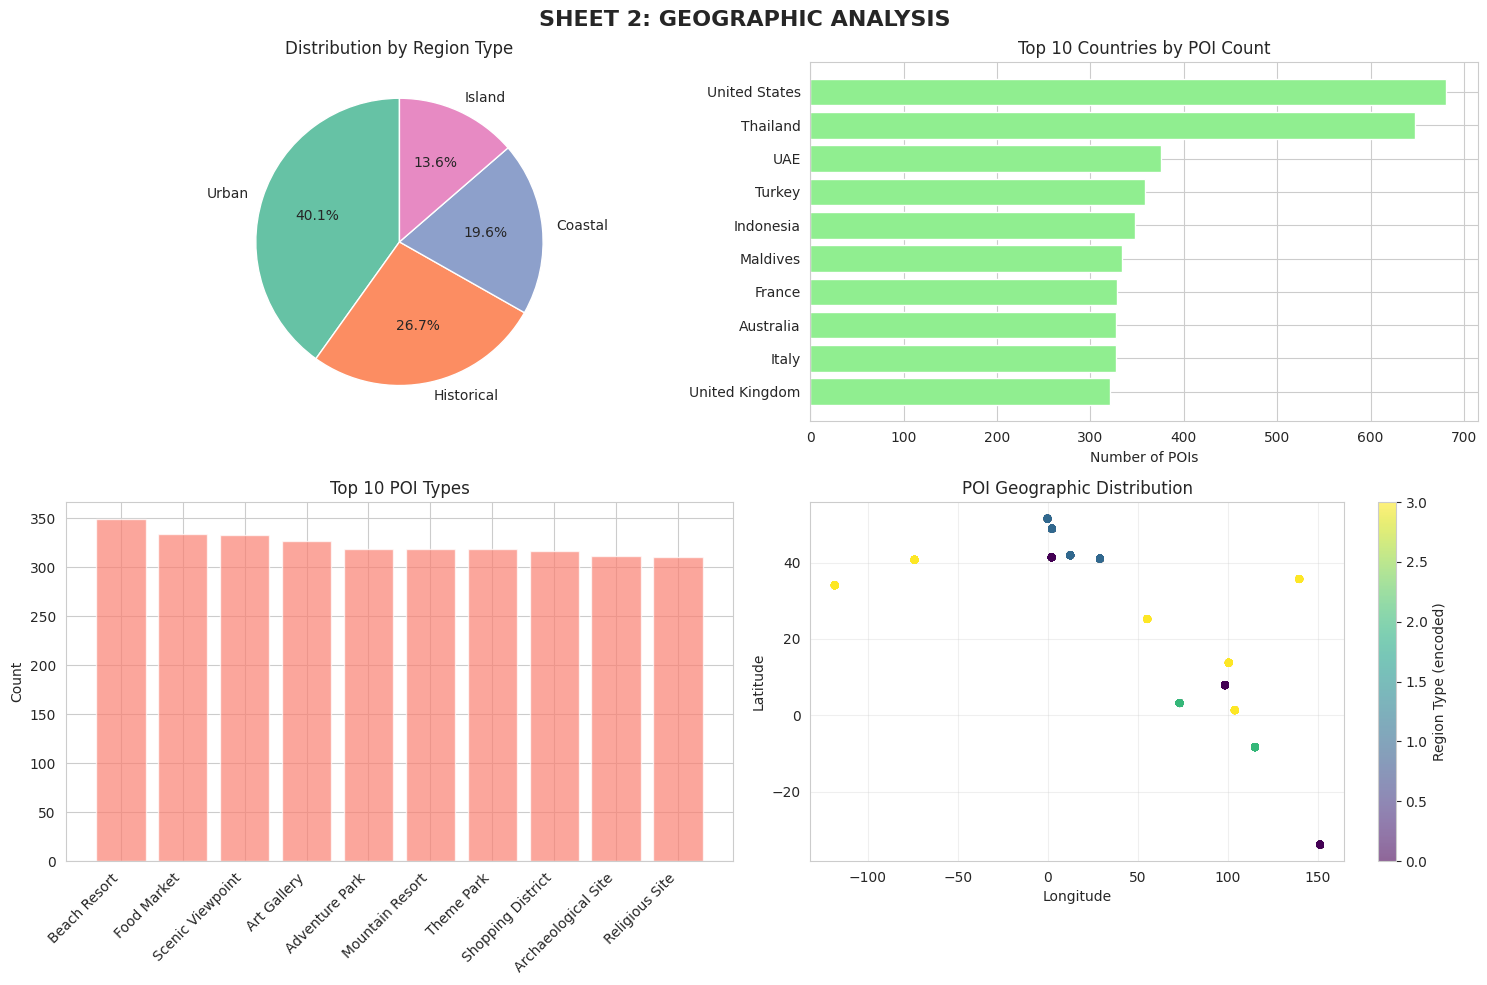

✅ Saved: Sheet2_01_Geographic_Distribution.png

📊 Creating Visualization 2: Quality & Safety Metrics...


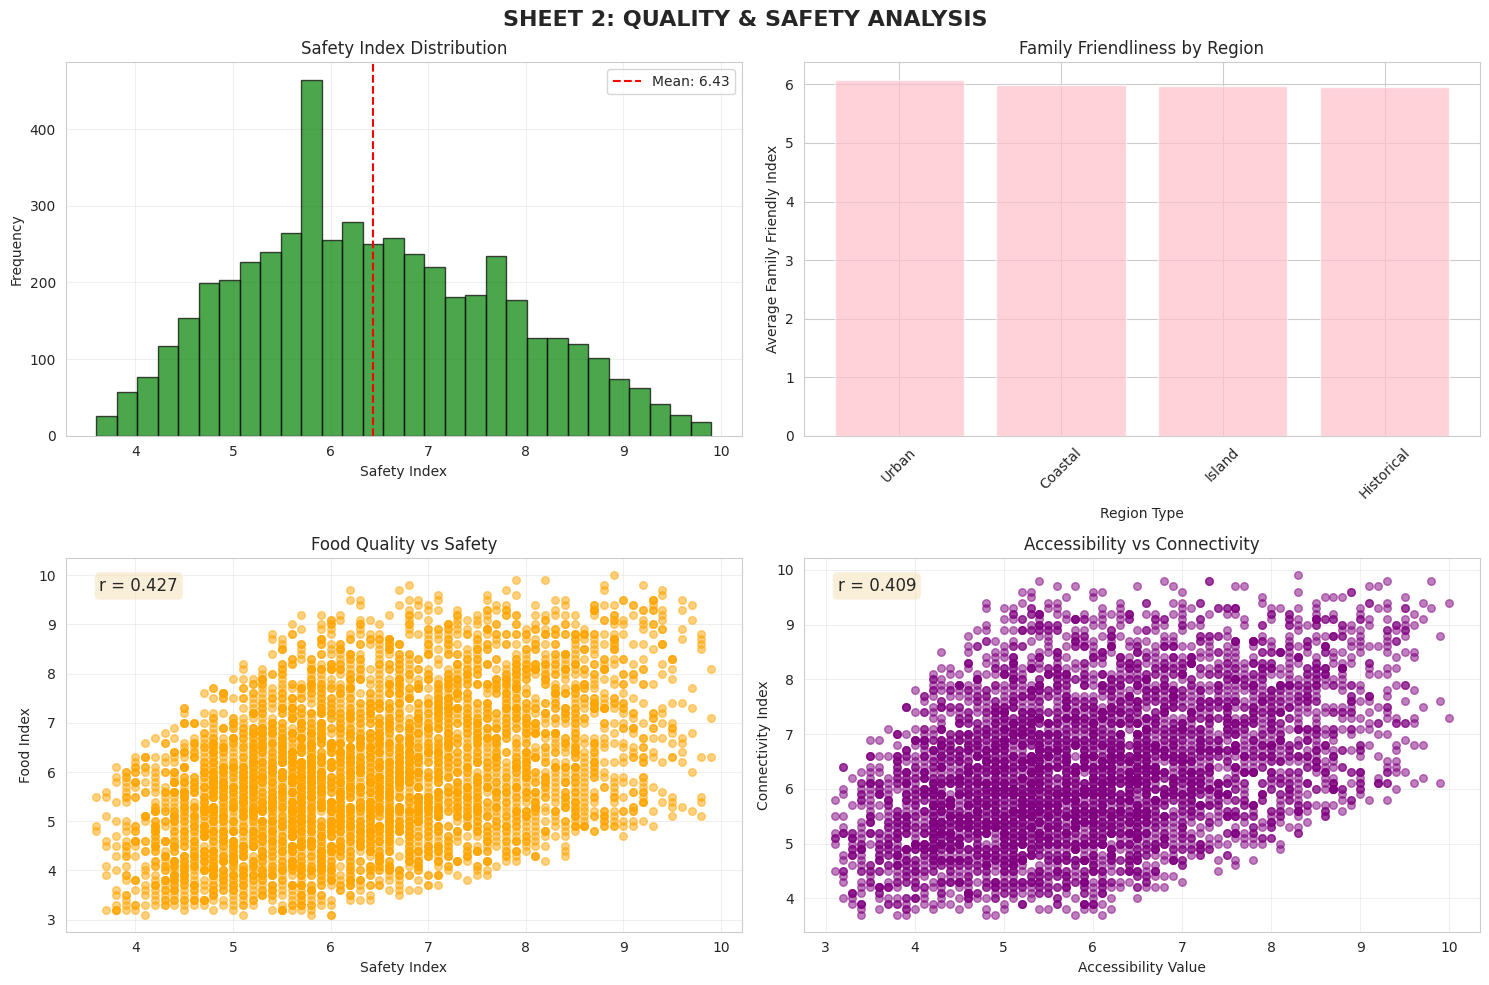

✅ Saved: Sheet2_02_Quality_Safety_Analysis.png

📊 Creating Visualization 3: Visitor & Cost Analysis...


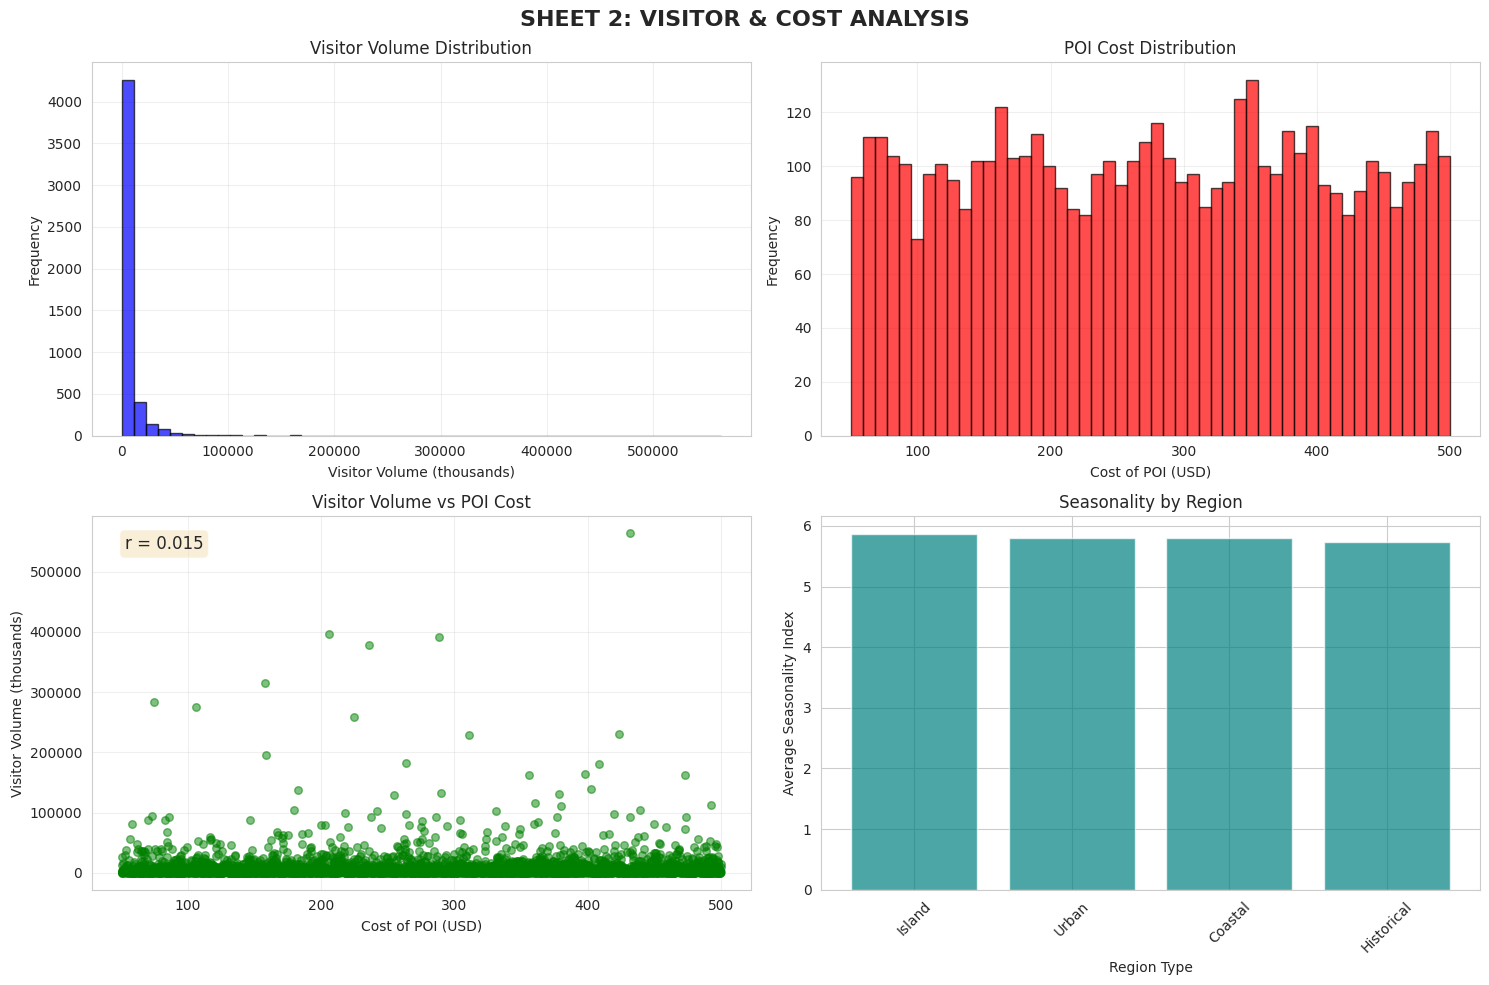

✅ Saved: Sheet2_03_Visitor_Cost_Analysis.png

📊 Creating Visualization 4: VALID Correlation Matrix...


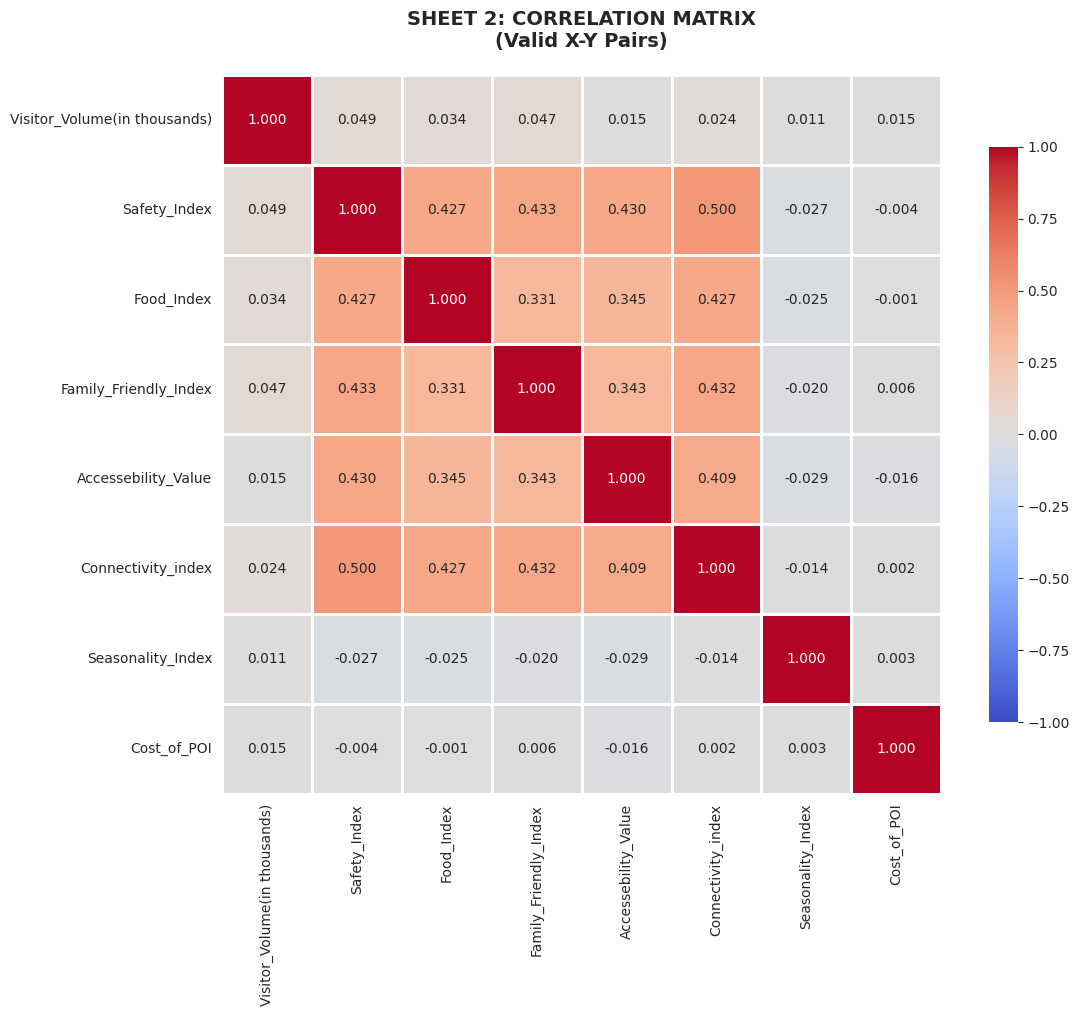

✅ Saved: Sheet2_04_Correlation_Matrix.png

✅ SHEET 2 VISUALIZATIONS COMPLETE!

Files Created:
   1. Sheet2_01_Geographic_Distribution.png
   2. Sheet2_02_Quality_Safety_Analysis.png
   3. Sheet2_03_Visitor_Cost_Analysis.png
   4. Sheet2_04_Correlation_Matrix.png (VALID X-Y pairs)


In [17]:
# ═══════════════════════════════════════════════════════════════════════════
# COMPREHENSIVE VISUALIZATION - SHEET 2: GEOSPATIAL POI
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "="*80)
print("📊 SHEET 2: GEOSPATIAL POI - VISUALIZATION ANALYSIS")
print("="*80)

# ═══════════════════════════════════════════════════════════════════════════
# LOAD DATA
# ═══════════════════════════════════════════════════════════════════════════

df_geo = pd.read_csv('FINAL_2_GEOSPATIAL_POI_CORRECTED.csv')
print(f"\n✅ Loaded Geospatial POI: {df_geo.shape}")

# ═══════════════════════════════════════════════════════════════════════════
# VISUALIZATION 1: GEOGRAPHIC DISTRIBUTION
# ═══════════════════════════════════════════════════════════════════════════

print("\n📊 Creating Visualization 1: Geographic Distribution...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('SHEET 2: GEOGRAPHIC ANALYSIS', fontsize=16, fontweight='bold')

# 1.1 Region Type Distribution
region_counts = df_geo['Region_type'].value_counts()
axes[0, 0].pie(region_counts.values, labels=region_counts.index, autopct='%1.1f%%',
               startangle=90, colors=sns.color_palette('Set2'))
axes[0, 0].set_title('Distribution by Region Type')

# 1.2 Country Distribution (Top 10)
country_counts = df_geo['Country'].value_counts().head(10)
axes[0, 1].barh(country_counts.index, country_counts.values, color='lightgreen')
axes[0, 1].set_xlabel('Number of POIs')
axes[0, 1].set_title('Top 10 Countries by POI Count')
axes[0, 1].invert_yaxis()

# 1.3 POI Type Distribution
poi_type_counts = df_geo['POI_Type_Detailed'].value_counts().head(10)
axes[1, 0].bar(range(len(poi_type_counts)), poi_type_counts.values, color='salmon', alpha=0.7)
axes[1, 0].set_xticks(range(len(poi_type_counts)))
axes[1, 0].set_xticklabels(poi_type_counts.index, rotation=45, ha='right')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Top 10 POI Types')

# 1.4 Geographic Scatter Plot (Lat/Long)
scatter = axes[1, 1].scatter(df_geo['POI_Longitude'], df_geo['POI_Latitude'],
                             c=pd.Categorical(df_geo['Region_type']).codes,
                             cmap='viridis', alpha=0.6, s=20)
axes[1, 1].set_xlabel('Longitude')
axes[1, 1].set_ylabel('Latitude')
axes[1, 1].set_title('POI Geographic Distribution')
axes[1, 1].grid(alpha=0.3)
plt.colorbar(scatter, ax=axes[1, 1], label='Region Type (encoded)')

plt.tight_layout()
plt.savefig('Sheet2_01_Geographic_Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: Sheet2_01_Geographic_Distribution.png")

# ═══════════════════════════════════════════════════════════════════════════
# VISUALIZATION 2: QUALITY & SAFETY METRICS
# ═══════════════════════════════════════════════════════════════════════════

print("\n📊 Creating Visualization 2: Quality & Safety Metrics...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('SHEET 2: QUALITY & SAFETY ANALYSIS', fontsize=16, fontweight='bold')

# 2.1 Safety Index Distribution
axes[0, 0].hist(df_geo['Safety_Index'], bins=30, color='green', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df_geo['Safety_Index'].mean(), color='red', linestyle='--',
                    label=f"Mean: {df_geo['Safety_Index'].mean():.2f}")
axes[0, 0].set_xlabel('Safety Index')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Safety Index Distribution')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2.2 Family Friendly Index by Region
family_by_region = df_geo.groupby('Region_type')['Family_Friendly_Index'].mean().sort_values(ascending=False)
axes[0, 1].bar(family_by_region.index, family_by_region.values, color='pink', alpha=0.7)
axes[0, 1].set_xlabel('Region Type')
axes[0, 1].set_ylabel('Average Family Friendly Index')
axes[0, 1].set_title('Family Friendliness by Region')
axes[0, 1].tick_params(axis='x', rotation=45)

# 2.3 Food Index vs Safety Index
axes[1, 0].scatter(df_geo['Safety_Index'], df_geo['Food_Index'],
                   alpha=0.5, color='orange', s=30)
axes[1, 0].set_xlabel('Safety Index')
axes[1, 0].set_ylabel('Food Index')
axes[1, 0].set_title('Food Quality vs Safety')
axes[1, 0].grid(alpha=0.3)
corr = df_geo['Safety_Index'].corr(df_geo['Food_Index'])
axes[1, 0].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[1, 0].transAxes,
                fontsize=12, va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2.4 Accessibility vs Connectivity
axes[1, 1].scatter(df_geo['Accessebility_Value'], df_geo['Connectivity_index'],
                   alpha=0.5, color='purple', s=30)
axes[1, 1].set_xlabel('Accessibility Value')
axes[1, 1].set_ylabel('Connectivity Index')
axes[1, 1].set_title('Accessibility vs Connectivity')
axes[1, 1].grid(alpha=0.3)
corr = df_geo['Accessebility_Value'].corr(df_geo['Connectivity_index'])
axes[1, 1].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[1, 1].transAxes,
                fontsize=12, va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('Sheet2_02_Quality_Safety_Analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: Sheet2_02_Quality_Safety_Analysis.png")

# ═══════════════════════════════════════════════════════════════════════════
# VISUALIZATION 3: VISITOR & COST ANALYSIS
# ═══════════════════════════════════════════════════════════════════════════

print("\n📊 Creating Visualization 3: Visitor & Cost Analysis...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('SHEET 2: VISITOR & COST ANALYSIS', fontsize=16, fontweight='bold')

# 3.1 Visitor Volume Distribution
axes[0, 0].hist(df_geo['Visitor_Volume(in thousands)'], bins=50, color='blue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Visitor Volume (thousands)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Visitor Volume Distribution')
axes[0, 0].grid(alpha=0.3)

# 3.2 Cost of POI Distribution
axes[0, 1].hist(df_geo['Cost_of_POI'], bins=50, color='red', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Cost of POI (USD)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('POI Cost Distribution')
axes[0, 1].grid(alpha=0.3)

# 3.3 Visitor Volume vs Cost
axes[1, 0].scatter(df_geo['Cost_of_POI'], df_geo['Visitor_Volume(in thousands)'],
                   alpha=0.5, color='green', s=30)
axes[1, 0].set_xlabel('Cost of POI (USD)')
axes[1, 0].set_ylabel('Visitor Volume (thousands)')
axes[1, 0].set_title('Visitor Volume vs POI Cost')
axes[1, 0].grid(alpha=0.3)
corr = df_geo['Cost_of_POI'].corr(df_geo['Visitor_Volume(in thousands)'])
axes[1, 0].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[1, 0].transAxes,
                fontsize=12, va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 3.4 Seasonality Index by Region
seasonality_by_region = df_geo.groupby('Region_type')['Seasonality_Index'].mean().sort_values(ascending=False)
axes[1, 1].bar(seasonality_by_region.index, seasonality_by_region.values, color='teal', alpha=0.7)
axes[1, 1].set_xlabel('Region Type')
axes[1, 1].set_ylabel('Average Seasonality Index')
axes[1, 1].set_title('Seasonality by Region')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('Sheet2_03_Visitor_Cost_Analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: Sheet2_03_Visitor_Cost_Analysis.png")

# ═══════════════════════════════════════════════════════════════════════════
# VISUALIZATION 4: VALID CORRELATION MATRIX (SHEET 2)
# ═══════════════════════════════════════════════════════════════════════════

print("\n📊 Creating Visualization 4: VALID Correlation Matrix...")

# Select DIFFERENT numeric columns
geo_corr_cols = [
    'Visitor_Volume(in thousands)',
    'Safety_Index',
    'Food_Index',
    'Family_Friendly_Index',
    'Accessebility_Value',
    'Connectivity_index',
    'Seasonality_Index',
    'Cost_of_POI'
]

corr_matrix_geo = df_geo[geo_corr_cols].corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix_geo, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax)

ax.set_title('SHEET 2: CORRELATION MATRIX\n(Valid X-Y Pairs)',
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('Sheet2_04_Correlation_Matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: Sheet2_04_Correlation_Matrix.png")

print("\n" + "="*80)
print("✅ SHEET 2 VISUALIZATIONS COMPLETE!")
print("="*80)
print("\nFiles Created:")
print("   1. Sheet2_01_Geographic_Distribution.png")
print("   2. Sheet2_02_Quality_Safety_Analysis.png")
print("   3. Sheet2_03_Visitor_Cost_Analysis.png")
print("   4. Sheet2_04_Correlation_Matrix.png (VALID X-Y pairs)")

📊 SHEET 3: MARKET TRENDS - VISUALIZATION ANALYSIS

✅ Loaded Market Trends: (5000, 13)
   Columns: ['POI_ID', 'Common_Travel_Partner', 'Total_Visitors', 'Dominant_Age_Group', 'Origin_Country', 'Average_Sentiment_Score', 'Average_Rating', 'Reviews', 'Avg_spend_per_head', 'Accesebility_index', 'Travel_mode', 'time_spent', 'Overall_experience']

📊 Creating Visualization 1: Travel Behavior Analysis...


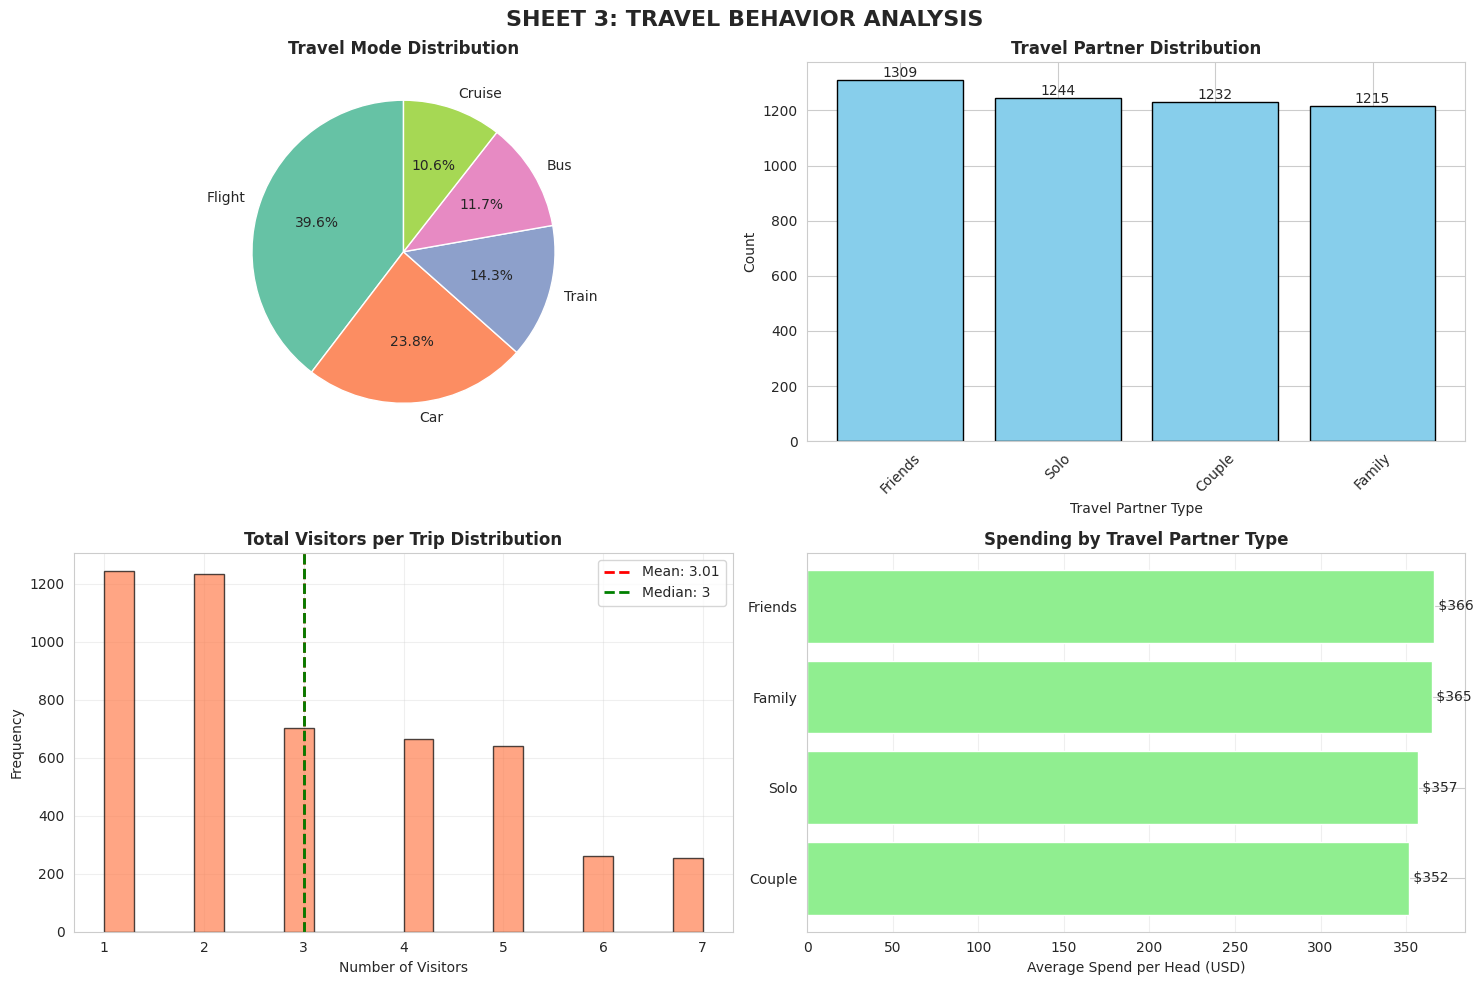

✅ Saved: Sheet3_01_Travel_Behavior.png

📊 Creating Visualization 2: Customer Experience Metrics...


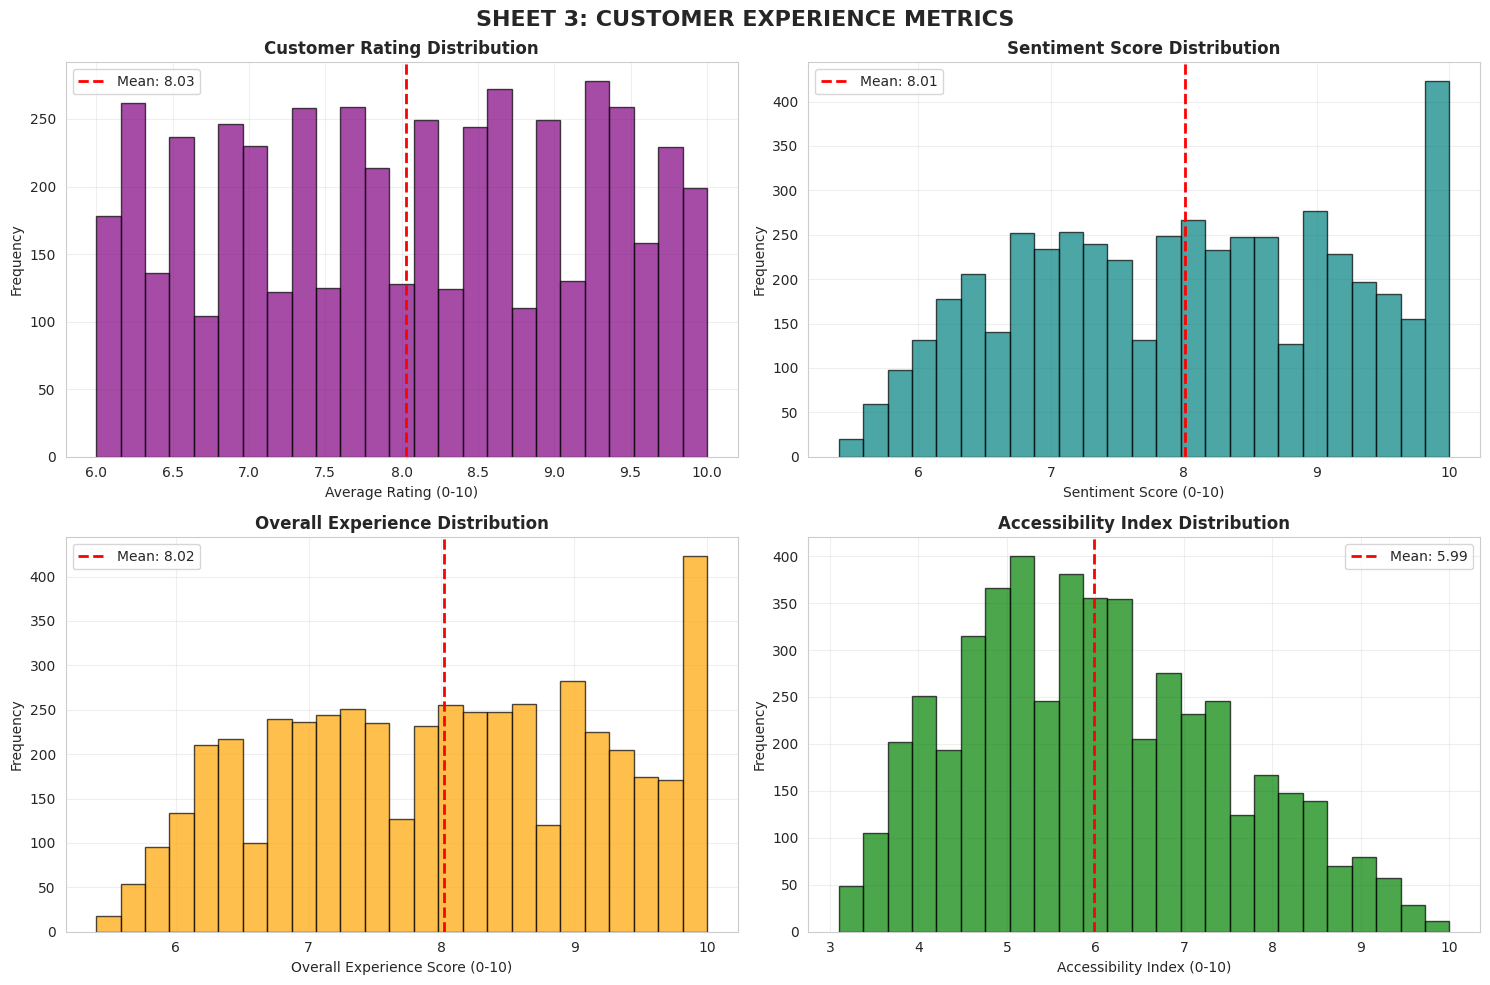

✅ Saved: Sheet3_02_Experience_Metrics.png

📊 Creating Visualization 3: VALID Correlation Analysis...


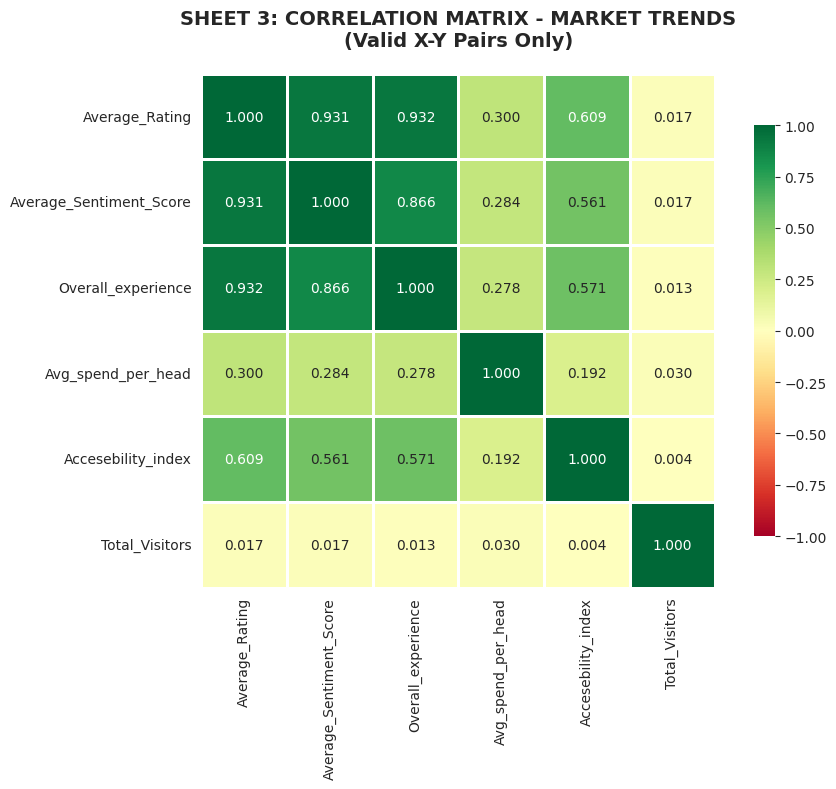

✅ Saved: Sheet3_03_Correlation_Matrix.png

🔍 STRONG CORRELATIONS (|r| > 0.7):
────────────────────────────────────────────────────────────────────────────────
   Average_Rating                 ↔ Average_Sentiment_Score       :  0.931
   Average_Rating                 ↔ Overall_experience            :  0.932
   Average_Sentiment_Score        ↔ Overall_experience            :  0.866

📊 Creating Visualization 4: Scatter Plot Relationships...


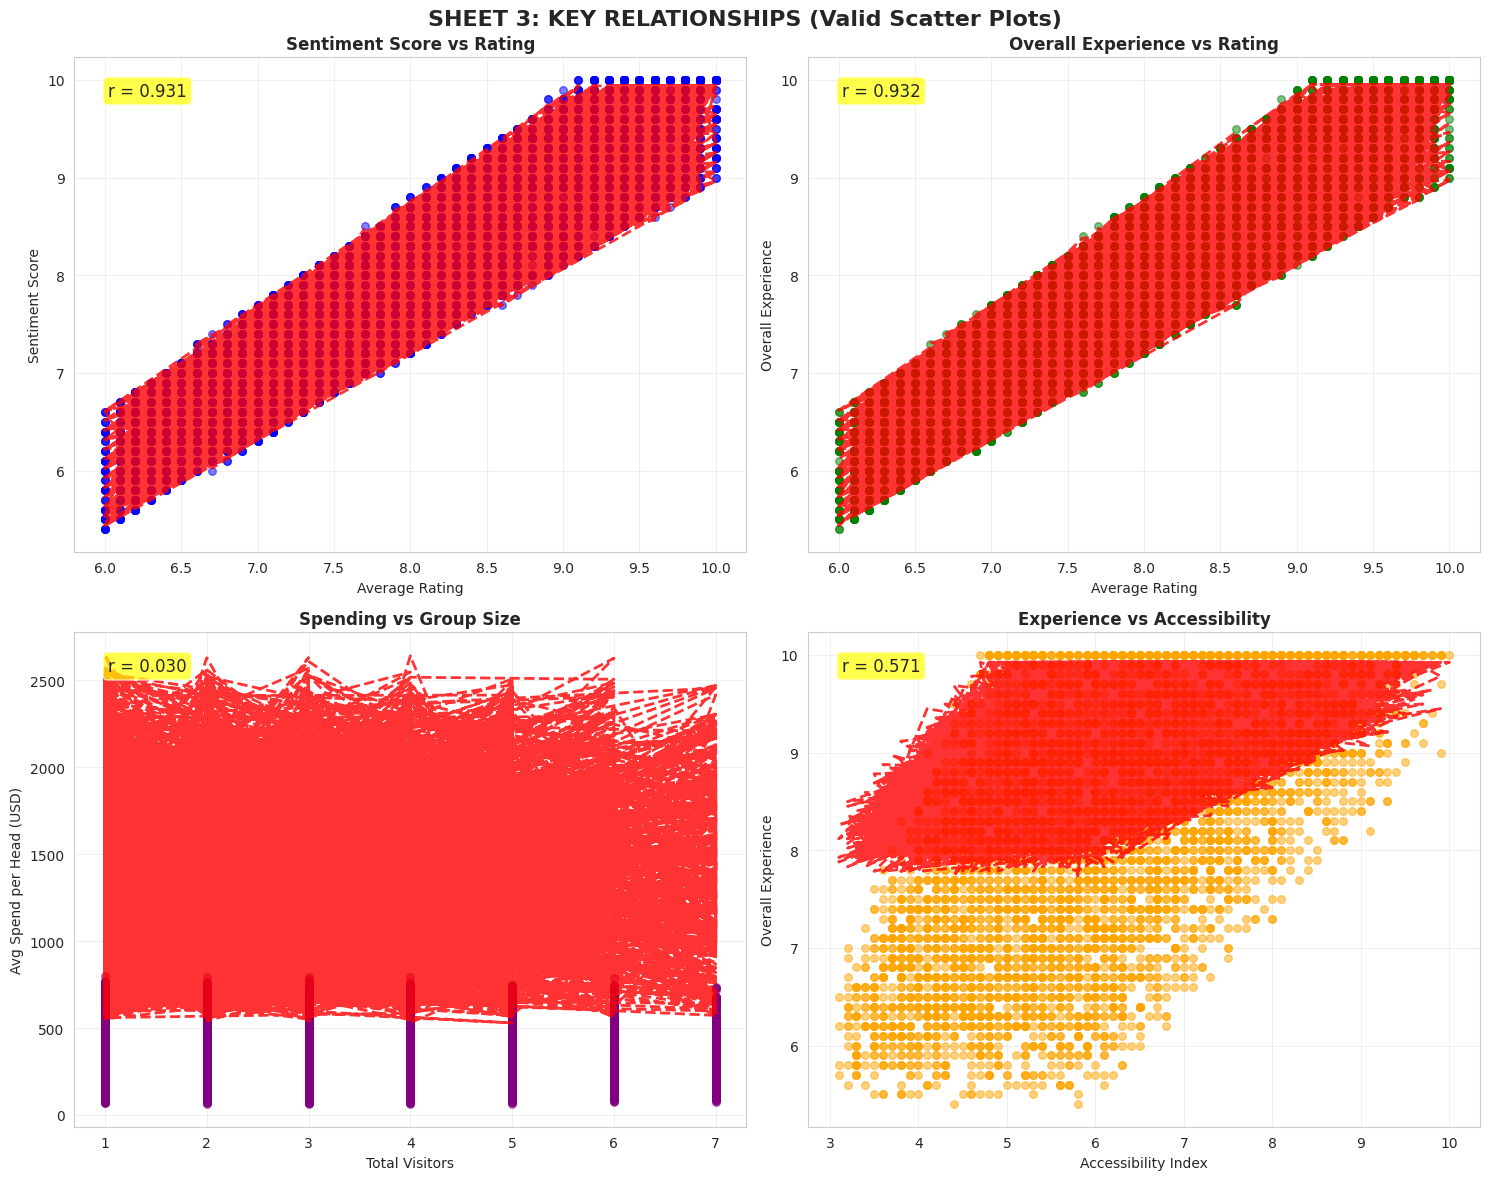

✅ Saved: Sheet3_04_Scatter_Relationships.png

📊 Creating Visualization 5: Demographic Analysis...


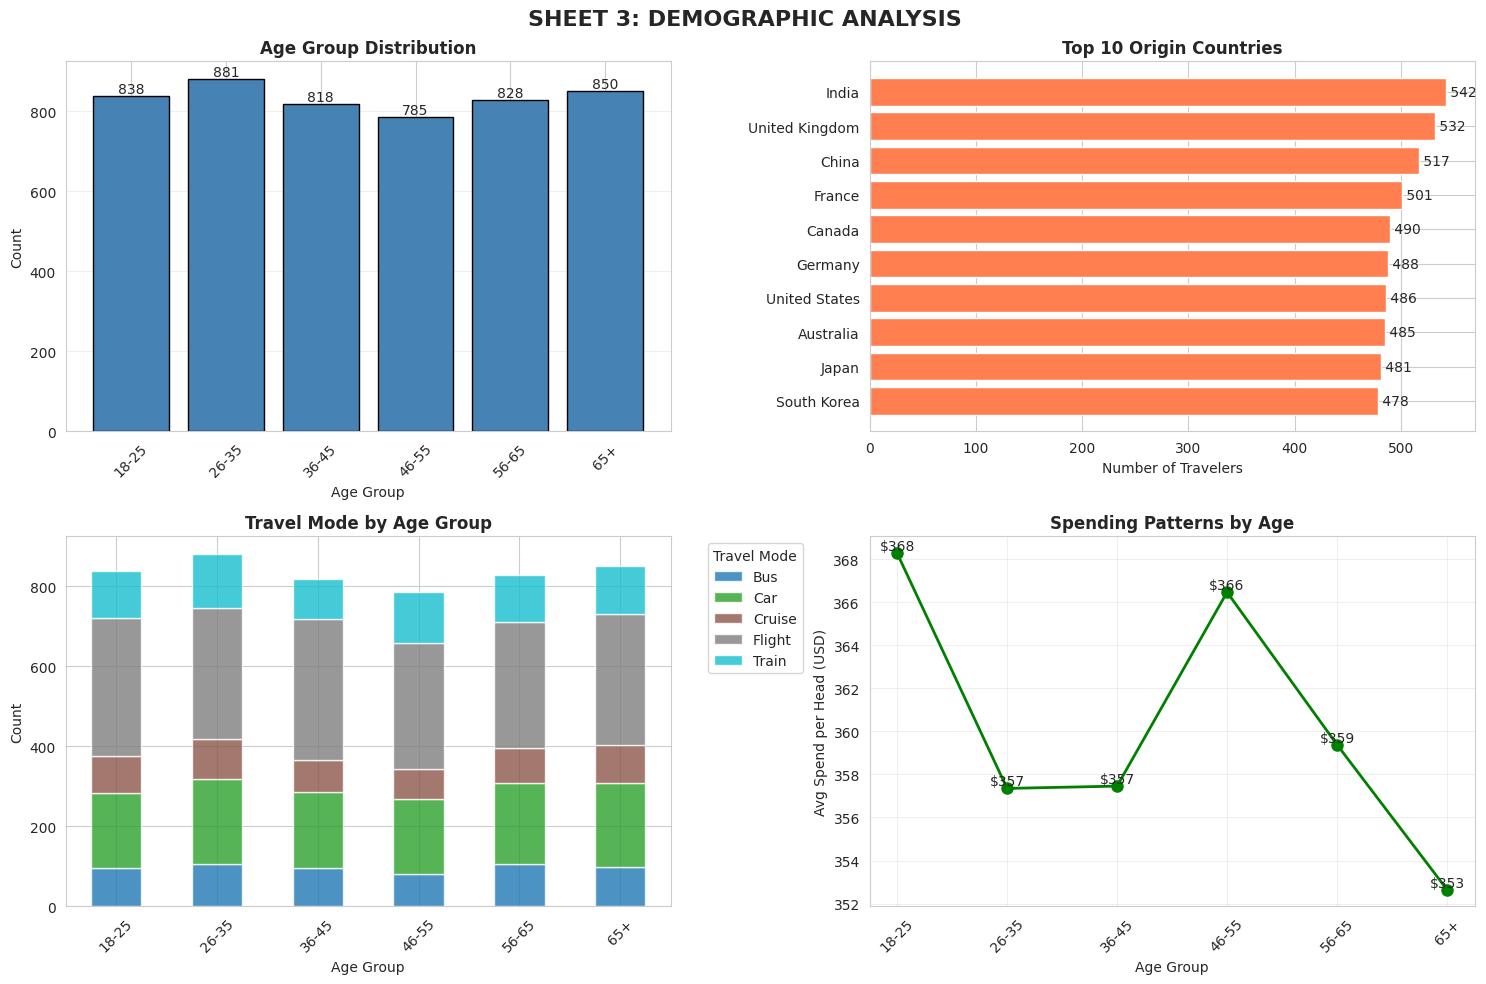

✅ Saved: Sheet3_05_Demographics.png

📊 Creating Visualization 6: Reviews Word Cloud...


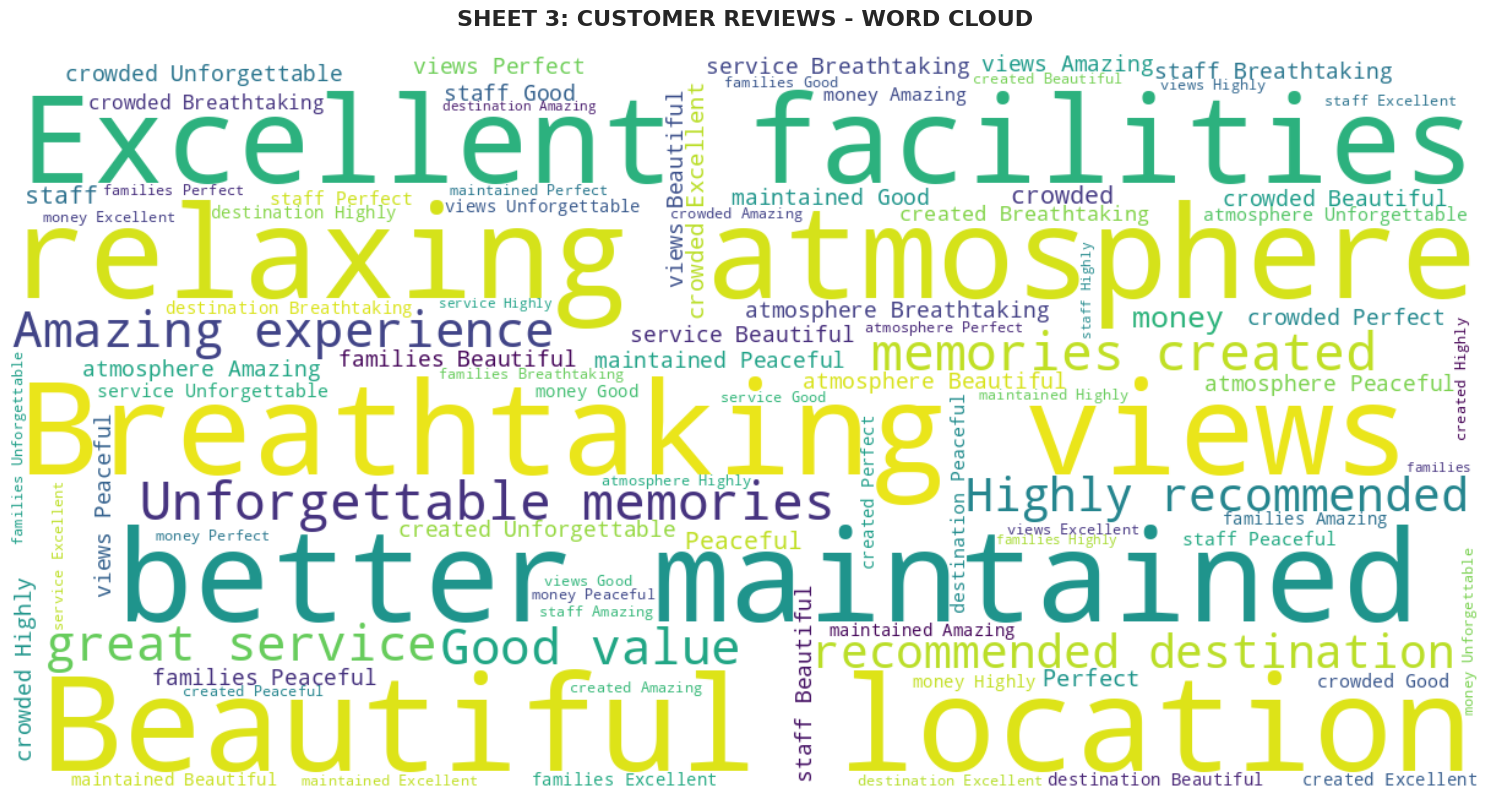

✅ Saved: Sheet3_06_Reviews_WordCloud.png

📊 Creating Visualization 7: Comparison Box Plots...


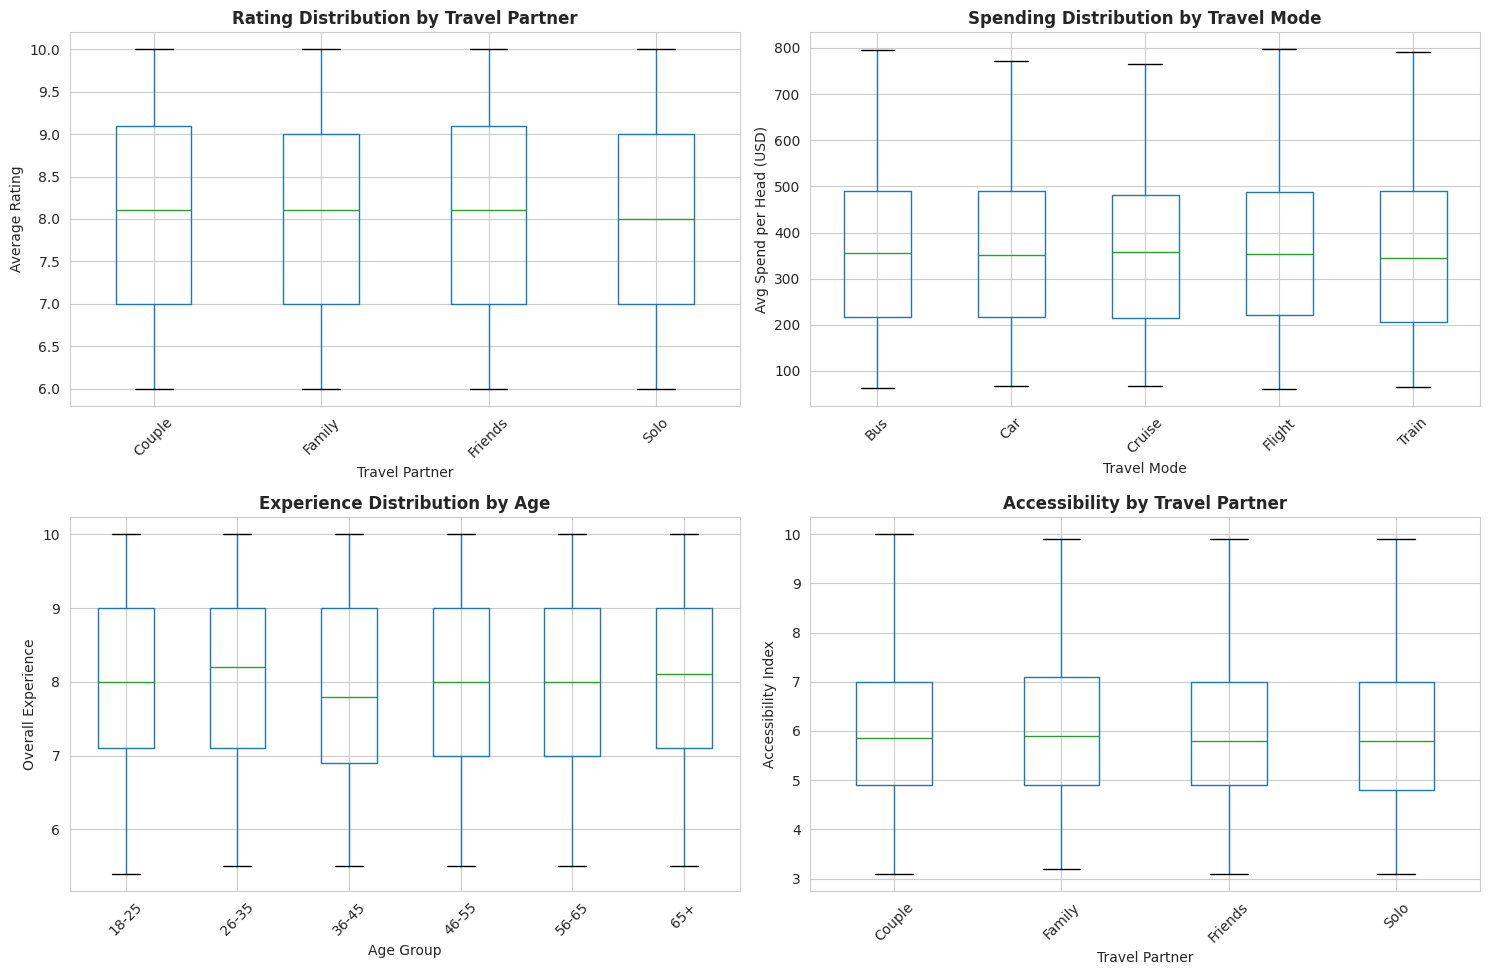

✅ Saved: Sheet3_07_Comparative_BoxPlots.png

📊 Creating Visualization 8: Interactive Plotly Charts...
✅ Saved: Sheet3_08_Interactive_3D_Scatter.html
✅ Saved: Sheet3_09_Interactive_Sunburst.html

✅ SHEET 3 VISUALIZATIONS COMPLETE!

📊 FILES CREATED:
────────────────────────────────────────────────────────────────────────────────
   1. ✅ Sheet3_01_Travel_Behavior.png
   2. ✅ Sheet3_02_Experience_Metrics.png
   3. ✅ Sheet3_03_Correlation_Matrix.png (VALID X-Y pairs)
   4. ✅ Sheet3_04_Scatter_Relationships.png (VALID correlations)
   5. ✅ Sheet3_05_Demographics.png
   6. ✅ Sheet3_06_Reviews_WordCloud.png
   7. ✅ Sheet3_07_Comparative_BoxPlots.png
   8. ✅ Sheet3_08_Interactive_3D_Scatter.html
   9. ✅ Sheet3_09_Interactive_Sunburst.html

🎯 KEY INSIGHTS FROM VISUALIZATIONS:
────────────────────────────────────────────────────────────────────────────────
   • Most common travel mode: Flight
   • Most common travel partner: Friends
   • Average customer rating: 8.03/10
   • Average sentiment sco

In [21]:
# ═══════════════════════════════════════════════════════════════════════════
# COMPREHENSIVE VISUALIZATION - SHEET 3: MARKET TRENDS
# ═══════════════════════════════════════════════════════════════════════════

!pip install pandas numpy matplotlib seaborn plotly scipy scikit-learn openpyxl wordcloud -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("="*80)
print("📊 SHEET 3: MARKET TRENDS - VISUALIZATION ANALYSIS")
print("="*80)

# ═══════════════════════════════════════════════════════════════════════════
# LOAD DATA
# ═══════════════════════════════════════════════════════════════════════════

df_market = pd.read_csv('FINAL_3_MARKET_TRENDS_CORRECTED.csv')
print(f"\n✅ Loaded Market Trends: {df_market.shape}")
print(f"   Columns: {list(df_market.columns)}")

# Create output folder
import os
os.makedirs('Sheet3_Visualizations', exist_ok=True)

# ═══════════════════════════════════════════════════════════════════════════
# VISUALIZATION 1: TRAVEL BEHAVIOR ANALYSIS
# ═══════════════════════════════════════════════════════════════════════════

print("\n📊 Creating Visualization 1: Travel Behavior Analysis...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('SHEET 3: TRAVEL BEHAVIOR ANALYSIS', fontsize=16, fontweight='bold')

# 1.1 Travel Mode Distribution
travel_mode_counts = df_market['Travel_mode'].value_counts()
axes[0, 0].pie(travel_mode_counts.values, labels=travel_mode_counts.index,
               autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
axes[0, 0].set_title('Travel Mode Distribution', fontweight='bold')

# 1.2 Travel Partner Distribution
partner_counts = df_market['Common_Travel_Partner'].value_counts()
axes[0, 1].bar(partner_counts.index, partner_counts.values, color='skyblue', edgecolor='black')
axes[0, 1].set_xlabel('Travel Partner Type')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Travel Partner Distribution', fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(partner_counts.values):
    axes[0, 1].text(i, v, str(v), ha='center', va='bottom')

# 1.3 Total Visitors Distribution
axes[1, 0].hist(df_market['Total_Visitors'], bins=20, color='coral',
                edgecolor='black', alpha=0.7)
axes[1, 0].axvline(df_market['Total_Visitors'].mean(), color='red',
                    linestyle='--', linewidth=2,
                    label=f"Mean: {df_market['Total_Visitors'].mean():.2f}")
axes[1, 0].axvline(df_market['Total_Visitors'].median(), color='green',
                    linestyle='--', linewidth=2,
                    label=f"Median: {df_market['Total_Visitors'].median():.0f}")
axes[1, 0].set_xlabel('Number of Visitors')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Total Visitors per Trip Distribution', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 1.4 Average Spending by Travel Partner
spend_by_partner = df_market.groupby('Common_Travel_Partner')['Avg_spend_per_head'].mean().sort_values()
axes[1, 1].barh(spend_by_partner.index, spend_by_partner.values, color='lightgreen')
axes[1, 1].set_xlabel('Average Spend per Head (USD)')
axes[1, 1].set_title('Spending by Travel Partner Type', fontweight='bold')
for i, v in enumerate(spend_by_partner.values):
    axes[1, 1].text(v, i, f' ${v:.0f}', va='center')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('Sheet3_Visualizations/Sheet3_01_Travel_Behavior.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: Sheet3_01_Travel_Behavior.png")

# ═══════════════════════════════════════════════════════════════════════════
# VISUALIZATION 2: CUSTOMER EXPERIENCE METRICS
# ═══════════════════════════════════════════════════════════════════════════

print("\n📊 Creating Visualization 2: Customer Experience Metrics...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('SHEET 3: CUSTOMER EXPERIENCE METRICS', fontsize=16, fontweight='bold')

# 2.1 Average Rating Distribution
axes[0, 0].hist(df_market['Average_Rating'], bins=25, color='purple',
                edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df_market['Average_Rating'].mean(), color='red',
                    linestyle='--', linewidth=2,
                    label=f"Mean: {df_market['Average_Rating'].mean():.2f}")
axes[0, 0].set_xlabel('Average Rating (0-10)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Customer Rating Distribution', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2.2 Sentiment Score Distribution
axes[0, 1].hist(df_market['Average_Sentiment_Score'], bins=25, color='teal',
                edgecolor='black', alpha=0.7)
axes[0, 1].axvline(df_market['Average_Sentiment_Score'].mean(), color='red',
                    linestyle='--', linewidth=2,
                    label=f"Mean: {df_market['Average_Sentiment_Score'].mean():.2f}")
axes[0, 1].set_xlabel('Sentiment Score (0-10)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Sentiment Score Distribution', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 2.3 Overall Experience Distribution
axes[1, 0].hist(df_market['Overall_experience'], bins=25, color='orange',
                edgecolor='black', alpha=0.7)
axes[1, 0].axvline(df_market['Overall_experience'].mean(), color='red',
                    linestyle='--', linewidth=2,
                    label=f"Mean: {df_market['Overall_experience'].mean():.2f}")
axes[1, 0].set_xlabel('Overall Experience Score (0-10)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Overall Experience Distribution', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 2.4 Accessibility Index Distribution
axes[1, 1].hist(df_market['Accesebility_index'], bins=25, color='green',
                edgecolor='black', alpha=0.7)
axes[1, 1].axvline(df_market['Accesebility_index'].mean(), color='red',
                    linestyle='--', linewidth=2,
                    label=f"Mean: {df_market['Accesebility_index'].mean():.2f}")
axes[1, 1].set_xlabel('Accessibility Index (0-10)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Accessibility Index Distribution', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('Sheet3_Visualizations/Sheet3_02_Experience_Metrics.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: Sheet3_02_Experience_Metrics.png")

# ═══════════════════════════════════════════════════════════════════════════
# VISUALIZATION 3: VALID CORRELATION ANALYSIS (NO X-Y SAME!)
# ═══════════════════════════════════════════════════════════════════════════

print("\n📊 Creating Visualization 3: VALID Correlation Analysis...")

# Select DIFFERENT numeric columns for correlation
correlation_cols = [
    'Average_Rating',
    'Average_Sentiment_Score',
    'Overall_experience',
    'Avg_spend_per_head',
    'Accesebility_index',
    'Total_Visitors'
]

# Calculate correlation matrix
corr_matrix = df_market[correlation_cols].corr()

# Create figure
fig, ax = plt.subplots(figsize=(10, 8))

# Heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='RdYlGn', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax)

ax.set_title('SHEET 3: CORRELATION MATRIX - MARKET TRENDS\n(Valid X-Y Pairs Only)',
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('Sheet3_Visualizations/Sheet3_03_Correlation_Matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: Sheet3_03_Correlation_Matrix.png")

# Print strong correlations
print("\n🔍 STRONG CORRELATIONS (|r| > 0.7):")
print("─" * 80)
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            print(f"   {corr_matrix.columns[i]:30s} ↔ {corr_matrix.columns[j]:30s}: {corr_val:6.3f}")

# ═══════════════════════════════════════════════════════════════════════════
# VISUALIZATION 4: SCATTER PLOT MATRIX (VALID PAIRS ONLY!)
# ═══════════════════════════════════════════════════════════════════════════

print("\n📊 Creating Visualization 4: Scatter Plot Relationships...")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('SHEET 3: KEY RELATIONSHIPS (Valid Scatter Plots)', fontsize=16, fontweight='bold')

# 4.1 Rating vs Sentiment Score
axes[0, 0].scatter(df_market['Average_Rating'], df_market['Average_Sentiment_Score'],
                   alpha=0.5, color='blue', s=30)
axes[0, 0].set_xlabel('Average Rating')
axes[0, 0].set_ylabel('Sentiment Score')
axes[0, 0].set_title('Sentiment Score vs Rating', fontweight='bold')
z = np.polyfit(df_market['Average_Rating'], df_market['Average_Sentiment_Score'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df_market['Average_Rating'], p(df_market['Average_Sentiment_Score']),
                "r--", alpha=0.8, linewidth=2)
corr = df_market['Average_Rating'].corr(df_market['Average_Sentiment_Score'])
axes[0, 0].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[0, 0].transAxes,
                fontsize=12, va='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
axes[0, 0].grid(alpha=0.3)

# 4.2 Rating vs Overall Experience
axes[0, 1].scatter(df_market['Average_Rating'], df_market['Overall_experience'],
                   alpha=0.5, color='green', s=30)
axes[0, 1].set_xlabel('Average Rating')
axes[0, 1].set_ylabel('Overall Experience')
axes[0, 1].set_title('Overall Experience vs Rating', fontweight='bold')
z = np.polyfit(df_market['Average_Rating'], df_market['Overall_experience'], 1)
p = np.poly1d(z)
axes[0, 1].plot(df_market['Average_Rating'], p(df_market['Overall_experience']),
                "r--", alpha=0.8, linewidth=2)
corr = df_market['Average_Rating'].corr(df_market['Overall_experience'])
axes[0, 1].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[0, 1].transAxes,
                fontsize=12, va='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
axes[0, 1].grid(alpha=0.3)

# 4.3 Spending vs Total Visitors
axes[1, 0].scatter(df_market['Total_Visitors'], df_market['Avg_spend_per_head'],
                   alpha=0.5, color='purple', s=30)
axes[1, 0].set_xlabel('Total Visitors')
axes[1, 0].set_ylabel('Avg Spend per Head (USD)')
axes[1, 0].set_title('Spending vs Group Size', fontweight='bold')
z = np.polyfit(df_market['Total_Visitors'], df_market['Avg_spend_per_head'], 1)
p = np.poly1d(z)
axes[1, 0].plot(df_market['Total_Visitors'], p(df_market['Avg_spend_per_head']),
                "r--", alpha=0.8, linewidth=2)
corr = df_market['Total_Visitors'].corr(df_market['Avg_spend_per_head'])
axes[1, 0].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[1, 0].transAxes,
                fontsize=12, va='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
axes[1, 0].grid(alpha=0.3)

# 4.4 Accessibility vs Overall Experience
axes[1, 1].scatter(df_market['Accesebility_index'], df_market['Overall_experience'],
                   alpha=0.5, color='orange', s=30)
axes[1, 1].set_xlabel('Accessibility Index')
axes[1, 1].set_ylabel('Overall Experience')
axes[1, 1].set_title('Experience vs Accessibility', fontweight='bold')
z = np.polyfit(df_market['Accesebility_index'], df_market['Overall_experience'], 1)
p = np.poly1d(z)
axes[1, 1].plot(df_market['Accesebility_index'], p(df_market['Overall_experience']),
                "r--", alpha=0.8, linewidth=2)
corr = df_market['Accesebility_index'].corr(df_market['Overall_experience'])
axes[1, 1].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[1, 1].transAxes,
                fontsize=12, va='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('Sheet3_Visualizations/Sheet3_04_Scatter_Relationships.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: Sheet3_04_Scatter_Relationships.png")

# ═══════════════════════════════════════════════════════════════════════════
# VISUALIZATION 5: DEMOGRAPHIC ANALYSIS
# ═══════════════════════════════════════════════════════════════════════════

print("\n📊 Creating Visualization 5: Demographic Analysis...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('SHEET 3: DEMOGRAPHIC ANALYSIS', fontsize=16, fontweight='bold')

# 5.1 Age Group Distribution
age_counts = df_market['Dominant_Age_Group'].value_counts().sort_index()
axes[0, 0].bar(age_counts.index, age_counts.values, color='steelblue', edgecolor='black')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Age Group Distribution', fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(age_counts.values):
    axes[0, 0].text(i, v, str(v), ha='center', va='bottom')
axes[0, 0].grid(axis='y', alpha=0.3)

# 5.2 Top 10 Origin Countries
origin_counts = df_market['Origin_Country'].value_counts().head(10)
axes[0, 1].barh(origin_counts.index, origin_counts.values, color='coral')
axes[0, 1].set_xlabel('Number of Travelers')
axes[0, 1].set_title('Top 10 Origin Countries', fontweight='bold')
axes[0, 1].invert_yaxis()
for i, v in enumerate(origin_counts.values):
    axes[0, 1].text(v, i, f' {v}', va='center')

# 5.3 Travel Mode by Age Group
travel_age_crosstab = pd.crosstab(df_market['Dominant_Age_Group'], df_market['Travel_mode'])
travel_age_crosstab.plot(kind='bar', stacked=True, ax=axes[1, 0],
                          colormap='tab10', alpha=0.8)
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Travel Mode by Age Group', fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(title='Travel Mode', bbox_to_anchor=(1.05, 1), loc='upper left')

# 5.4 Average Spending by Age Group
spend_by_age = df_market.groupby('Dominant_Age_Group')['Avg_spend_per_head'].mean().sort_index()
axes[1, 1].plot(spend_by_age.index, spend_by_age.values, marker='o',
                linewidth=2, markersize=8, color='green')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Avg Spend per Head (USD)')
axes[1, 1].set_title('Spending Patterns by Age', fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(alpha=0.3)
for x, y in zip(range(len(spend_by_age)), spend_by_age.values):
    axes[1, 1].text(x, y, f'${y:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('Sheet3_Visualizations/Sheet3_05_Demographics.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: Sheet3_05_Demographics.png")

# ═══════════════════════════════════════════════════════════════════════════
# VISUALIZATION 6: REVIEWS WORD CLOUD
# ═══════════════════════════════════════════════════════════════════════════

print("\n📊 Creating Visualization 6: Reviews Word Cloud...")

# Combine all reviews into one text
all_reviews = " ".join(df_market['Reviews'].dropna().astype(str).tolist())

# Generate word cloud
wordcloud = WordCloud(width=1200, height=600, background_color='white',
                      colormap='viridis', max_words=100).generate(all_reviews)

# Plot
fig, ax = plt.subplots(figsize=(15, 8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
ax.set_title('SHEET 3: CUSTOMER REVIEWS - WORD CLOUD',
             fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('Sheet3_Visualizations/Sheet3_06_Reviews_WordCloud.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: Sheet3_06_Reviews_WordCloud.png")

# ═══════════════════════════════════════════════════════════════════════════
# VISUALIZATION 7: BOX PLOTS FOR COMPARISON
# ═══════════════════════════════════════════════════════════════════════════

print("\n📊 Creating Visualization 7: Comparison Box Plots...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('SHEET 3: COMPARATIVE ANALYSIS (Box Plots)', fontsize=16, fontweight='bold')

# 7.1 Rating by Travel Partner
df_market.boxplot(column='Average_Rating', by='Common_Travel_Partner', ax=axes[0, 0])
axes[0, 0].set_xlabel('Travel Partner')
axes[0, 0].set_ylabel('Average Rating')
axes[0, 0].set_title('Rating Distribution by Travel Partner', fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=45)
plt.suptitle('')

# 7.2 Spending by Travel Mode
df_market.boxplot(column='Avg_spend_per_head', by='Travel_mode', ax=axes[0, 1])
axes[0, 1].set_xlabel('Travel Mode')
axes[0, 1].set_ylabel('Avg Spend per Head (USD)')
axes[0, 1].set_title('Spending Distribution by Travel Mode', fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)
plt.suptitle('')

# 7.3 Overall Experience by Age Group
df_market.boxplot(column='Overall_experience', by='Dominant_Age_Group', ax=axes[1, 0])
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Overall Experience')
axes[1, 0].set_title('Experience Distribution by Age', fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)
plt.suptitle('')

# 7.4 Accessibility by Travel Partner
df_market.boxplot(column='Accesebility_index', by='Common_Travel_Partner', ax=axes[1, 1])
axes[1, 1].set_xlabel('Travel Partner')
axes[1, 1].set_ylabel('Accessibility Index')
axes[1, 1].set_title('Accessibility by Travel Partner', fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)
plt.suptitle('')

plt.tight_layout()
plt.savefig('Sheet3_Visualizations/Sheet3_07_Comparative_BoxPlots.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: Sheet3_07_Comparative_BoxPlots.png")

# ═══════════════════════════════════════════════════════════════════════════
# VISUALIZATION 8: INTERACTIVE PLOTLY VISUALIZATIONS
# ═══════════════════════════════════════════════════════════════════════════

print("\n📊 Creating Visualization 8: Interactive Plotly Charts...")

# 8.1 3D Scatter: Rating vs Sentiment vs Experience
fig1 = px.scatter_3d(df_market,
                     x='Average_Rating',
                     y='Average_Sentiment_Score',
                     z='Overall_experience',
                     color='Travel_mode',
                     size='Avg_spend_per_head',
                     hover_data=['Common_Travel_Partner', 'Total_Visitors'],
                     title='3D Analysis: Rating * Sentiment * Experience',
                     labels={
                         'Average_Rating': 'Rating',
                         'Average_Sentiment_Score': 'Sentiment',
                         'Overall_experience': 'Experience'
                     })
fig1.update_layout(height=700)
fig1.write_html('Sheet3_Visualizations/Sheet3_08_Interactive_3D_Scatter.html')
print("✅ Saved: Sheet3_08_Interactive_3D_Scatter.html")

# 8.2 Sunburst: Travel Partner → Travel Mode → Age Group
fig2 = px.sunburst(df_market,
                   path=['Common_Travel_Partner', 'Travel_mode', 'Dominant_Age_Group'],
                   values='Total_Visitors',
                   title='Travel Hierarchy: Partner → Mode → Age Group',
                   color='Average_Rating',
                   color_continuous_scale='RdYlGn')
fig2.update_layout(height=700)
fig2.write_html('Sheet3_Visualizations/Sheet3_09_Interactive_Sunburst.html')
print("✅ Saved: Sheet3_09_Interactive_Sunburst.html")

# ═══════════════════════════════════════════════════════════════════════════
# FINAL SUMMARY
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "="*80)
print("✅ SHEET 3 VISUALIZATIONS COMPLETE!")
print("="*80)

print("\n📊 FILES CREATED:")
print("─" * 80)
print("   1. ✅ Sheet3_01_Travel_Behavior.png")
print("   2. ✅ Sheet3_02_Experience_Metrics.png")
print("   3. ✅ Sheet3_03_Correlation_Matrix.png (VALID X-Y pairs)")
print("   4. ✅ Sheet3_04_Scatter_Relationships.png (VALID correlations)")
print("   5. ✅ Sheet3_05_Demographics.png")
print("   6. ✅ Sheet3_06_Reviews_WordCloud.png")
print("   7. ✅ Sheet3_07_Comparative_BoxPlots.png")
print("   8. ✅ Sheet3_08_Interactive_3D_Scatter.html")
print("   9. ✅ Sheet3_09_Interactive_Sunburst.html")

print("\n🎯 KEY INSIGHTS FROM VISUALIZATIONS:")
print("─" * 80)
print(f"   • Most common travel mode: {df_market['Travel_mode'].mode()[0]}")
print(f"   • Most common travel partner: {df_market['Common_Travel_Partner'].mode()[0]}")
print(f"   • Average customer rating: {df_market['Average_Rating'].mean():.2f}/10")
print(f"   • Average sentiment score: {df_market['Average_Sentiment_Score'].mean():.2f}/10")
print(f"   • Average spending: ${df_market['Avg_spend_per_head'].mean():.2f} per person")
print(f"   • Dominant age group: {df_market['Dominant_Age_Group'].mode()[0]}")
print(f"   • Top origin country: {df_market['Origin_Country'].mode()[0]}")

print("\n💡 ALL VISUALIZATIONS USE VALID X-Y PAIRS (No same variable plots)")
print("="*80)